# Raisin Class Prediction

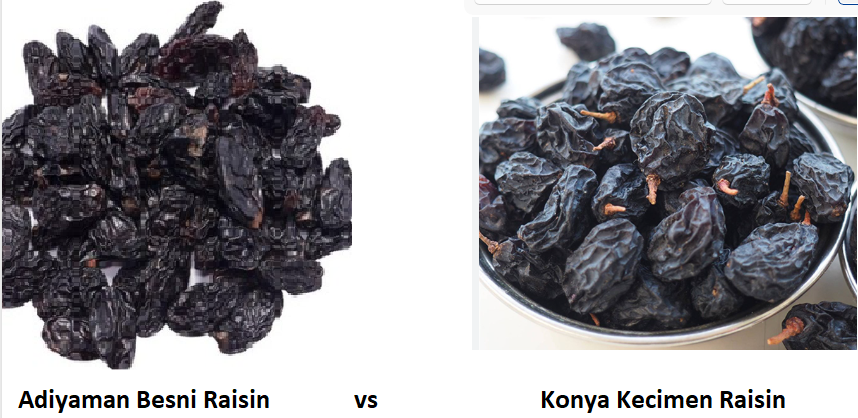

Data Set Information:

Images of Kecimen and Besni raisin varieties grown in Turkey were obtained with CVS. A total of 900 raisin grains were used, including 450 pieces from both varieties. These images were subjected to various stages of pre-processing and 7 morphological features were extracted. These features have been classified using three different artificial intelligence techniques.


Attribute Information:

1. Area: Gives the number of pixels within the boundaries of the raisin.
2. Perimeter: It measures the environment by calculating the distance between the boundaries of the raisin and the pixels around it.
3. MajorAxisLength: Gives the length of the main axis, which is the longest line that can be drawn on the raisin.
4. MinorAxisLength: Gives the length of the small axis, which is the shortest line that can be drawn on the raisin.
5. Eccentricity: It gives a measure of the eccentricity of the ellipse, which has the same moments as raisins.
6. ConvexArea: Gives the number of pixels of the smallest convex shell of the region formed by the raisin.
7. Extent: Gives the ratio of the region formed by the raisin to the total pixels in the bounding box.
8. Class: Kecimen and Besni raisin.

For further info; https://www.kaggle.com/datasets/muratkokludataset/raisin-dataset

https://www.kaggle.com/code/nathanperkins4223970/raisin-class-prediction-pytorch-mlp

https://dergipark.org.tr/en/download/article-file/1227592

# Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (12,7)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Exploratory Data Analysis and Visualization

### Read Data

In [2]:
df = pd.read_excel("Raisin_Dataset.xlsx")
df.head(5)

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  Extent  \
0  87524          442.246          253.291         0.820       90546   0.759   
1  75166          406.691          243.032         0.802       78789   0.684   
2  90856          442.267          266.328         0.798       93717   0.638   
3  45928          286.541          208.760         0.685       47336   0.700   
4  79408          352.191          290.828         0.564       81463   0.793   

   Perimeter    Class  
0   1184.040  Kecimen  
1   1121.786  Kecimen  
2   1208.575  Kecimen  
3    844.162  Kecimen  
4   1073.251  Kecimen

In [3]:
df.tail(5)

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
895  83248          430.077          247.839         0.817       85839   
896  87350          440.736          259.293         0.809       90899   
897  99657          431.707          298.837         0.722      106264   
898  93523          476.344          254.176         0.846       97653   
899  85609          512.082          215.272         0.907       89197   

     Extent  Perimeter  Class  
895   0.669   1129.072  Besni  
896   0.636   1214.252  Besni  
897   0.741   1292.828  Besni  
898   0.659   1258.548  Besni  
899   0.632   1272.862  Besni

In [4]:
df.sample(5)

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
722  126149          478.877          345.920         0.692      134778   
340   39724          271.666          189.485         0.717       41587   
748   82585          436.182          264.874         0.795       93928   
333   60313          339.603          227.726         0.742       62130   
739   83929          429.090          252.038         0.809       87269   

     Extent  Perimeter    Class  
722   0.625   1549.185    Besni  
340   0.724    781.970  Kecimen  
748   0.588   1320.460    Besni  
333   0.727    946.487  Kecimen  
739   0.705   1176.227    Besni

### info

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Area             900 non-null    int64  
 1   MajorAxisLength  900 non-null    float64
 2   MinorAxisLength  900 non-null    float64
 3   Eccentricity     900 non-null    float64
 4   ConvexArea       900 non-null    int64  
 5   Extent           900 non-null    float64
 6   Perimeter        900 non-null    float64
 7   Class            900 non-null    object 
dtypes: float64(5), int64(2), object(1)
memory usage: 56.4+ KB


* There are 900 observation, no null value, numerical values in int64 or float64. Just raisin kinds in object (string). 

In [6]:
# Let's change the "Class" from str to numeric;

df["Class"] = df["Class"].map({"Kecimen": 0, "Besni": 1})
df.head(2)

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  Extent  \
0  87524          442.246          253.291         0.820       90546   0.759   
1  75166          406.691          243.032         0.802       78789   0.684   

   Perimeter  Class  
0   1184.040      0  
1   1121.786      0

### Null value check

In [7]:
df.isnull().sum()

Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
Extent             0
Perimeter          0
Class              0
dtype: int64

* Tehere isn't any null value in the data set.

### Shape

In [8]:
df.shape

(900, 8)

* There are 900 rows and 8 columns in the data set.

### Column names

In [9]:
df.columns

Index(['Area', 'MajorAxisLength', 'MinorAxisLength', 'Eccentricity',
       'ConvexArea', 'Extent', 'Perimeter', 'Class'],
      dtype='object')

* Column names suitable for using in the analyses.

### Summary statistics

In [10]:
# For unique values;

def get_unique_values(df):
    
    output_data = []

    for col in df.columns:

        # If the number of unique values in the column is less than or equal to 5
        if df.loc[:, col].nunique() <= 10:
            # Get the unique values in the column
            unique_values = df.loc[:, col].unique()
            # Append the column name, number of unique values, unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(), unique_values, df.loc[:, col].dtype])
        else:
            # Otherwise, append only the column name, number of unique values, and data type to the output data
            output_data.append([col, df.loc[:, col].nunique(),"-", df.loc[:, col].dtype])

    output_df = pd.DataFrame(output_data, columns=['Column Name', 'Number of Unique Values', ' Unique Values ', 'Data Type'])

    return output_df

get_unique_values(df)

Column Name  Number of Unique Values  Unique Values  Data Type
0             Area                      900               -     int64
1  MajorAxisLength                      900               -   float64
2  MinorAxisLength                      900               -   float64
3     Eccentricity                      900               -   float64
4       ConvexArea                      896               -     int64
5           Extent                      900               -   float64
6        Perimeter                      900               -   float64
7            Class                        2          [0, 1]     int64

* There are only two unique variables, and our target variable includes them.  

### Balanced or Uncalanced

In [11]:
df["Class"].value_counts()

0    450
1    450
Name: Class, dtype: int64

* There are 450 Kecimen (0), 450 Besni (1) raisin in the data set (target variable). 
* So, there is a **balanced** dataset. 

### Descrptive Statistics

In [12]:
df.describe().T

count      mean       std       min       25%       50%  \
Area            900.000 87804.128 39002.111 25387.000 59348.000 78902.000   
MajorAxisLength 900.000   430.930   116.035   225.630   345.443   407.804   
MinorAxisLength 900.000   254.488    49.989   143.711   219.111   247.848   
Eccentricity    900.000     0.782     0.090     0.349     0.742     0.799   
ConvexArea      900.000 91186.090 40769.290 26139.000 61513.250 81651.000   
Extent          900.000     0.700     0.053     0.380     0.671     0.707   
Perimeter       900.000  1165.907   273.764   619.074   966.411  1119.509   
Class           900.000     0.500     0.500     0.000     0.000     0.500   

                       75%        max  
Area            105028.250 235047.000  
MajorAxisLength    494.187    997.292  
MinorAxisLength    279.889    492.275  
Eccentricity         0.843      0.962  
ConvexArea      108375.750 278217.000  
Extent               0.735      0.835  
Perimeter         1308.390   2697.753  
Class                1.000      1.000

* Standart deviation (std) is high in the "Area", "MajorAxisLength", "MinorAxisLength". "ConvexArea" and "Perimeter" features. For this reason **we should scale our data set**.

### Correlation Analysis

In [13]:
df_corr = df.corr()
df_corr

Area  MajorAxisLength  MinorAxisLength  Eccentricity  \
Area             1.000            0.933            0.907         0.336   
MajorAxisLength  0.933            1.000            0.728         0.584   
MinorAxisLength  0.907            0.728            1.000        -0.028   
Eccentricity     0.336            0.584           -0.028         1.000   
ConvexArea       0.996            0.945            0.896         0.348   
Extent          -0.013           -0.204            0.145        -0.361   
Perimeter        0.961            0.978            0.827         0.448   
Class            0.626            0.673            0.503         0.438   

                 ConvexArea  Extent  Perimeter  Class  
Area                  0.996  -0.013      0.961  0.626  
MajorAxisLength       0.945  -0.204      0.978  0.673  
MinorAxisLength       0.896   0.145      0.827  0.503  
Eccentricity          0.348  -0.361      0.448  0.438  
ConvexArea            1.000  -0.055      0.977  0.626  
Extent               -0.055   1.000     -0.173 -0.155  
Perimeter             0.977  -0.173      1.000  0.666  
Class                 0.626  -0.155      0.666  1.000

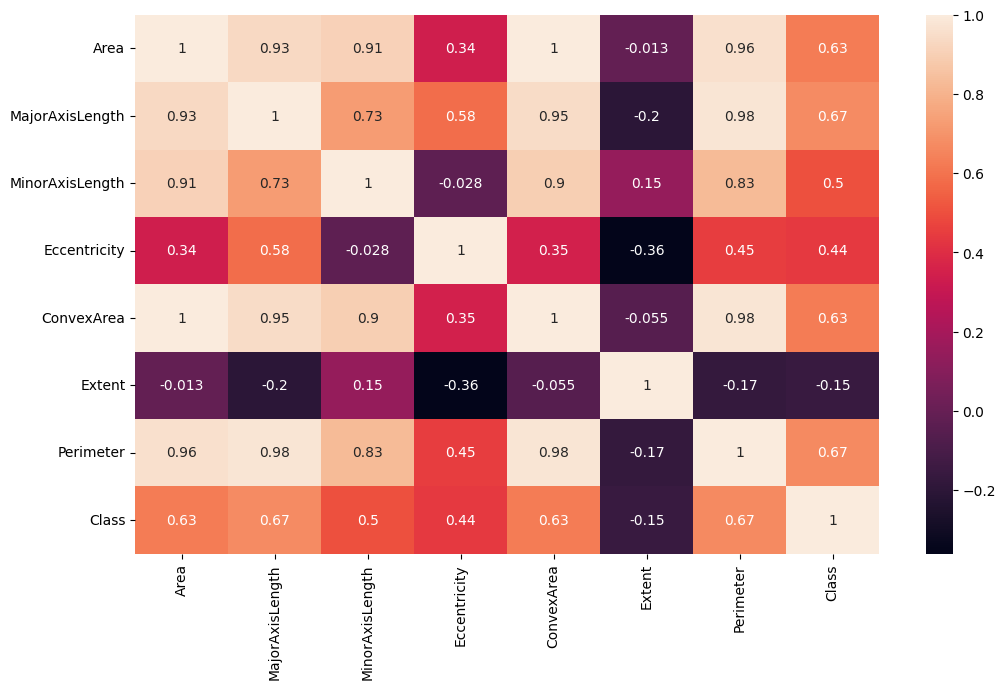

In [14]:
sns.heatmap(df.corr(), annot = True);

* There is a strong positive (0.93) correlation between "MajorAxisLength" and "Area"
* There is a strong positive (0.98) correlation between "MajorAxisLength" and "Perimeter"
* There is a strong positive (0.96) correlation between "Perimeter" and "Area"
* There is a relatively strong positive (0.83) correlation between "Perimeter" and "MinorAxisLength"
* There is a strong positive (0.98) correlation between "Perimeter" and "ConvexArea"
* There is a strong positive (0.95) correlation between "Perimeter" and "MajorAxisLength"
* There is a strong positive (0.90) correlation between "MinorAxisLength" and "ConvexArea".
* The variables with the lowest correlation with the target variable are 'MajorAxisLength' (0.67), 'Perimeter' (0.66) and 'ConvexArea' (0.62).  

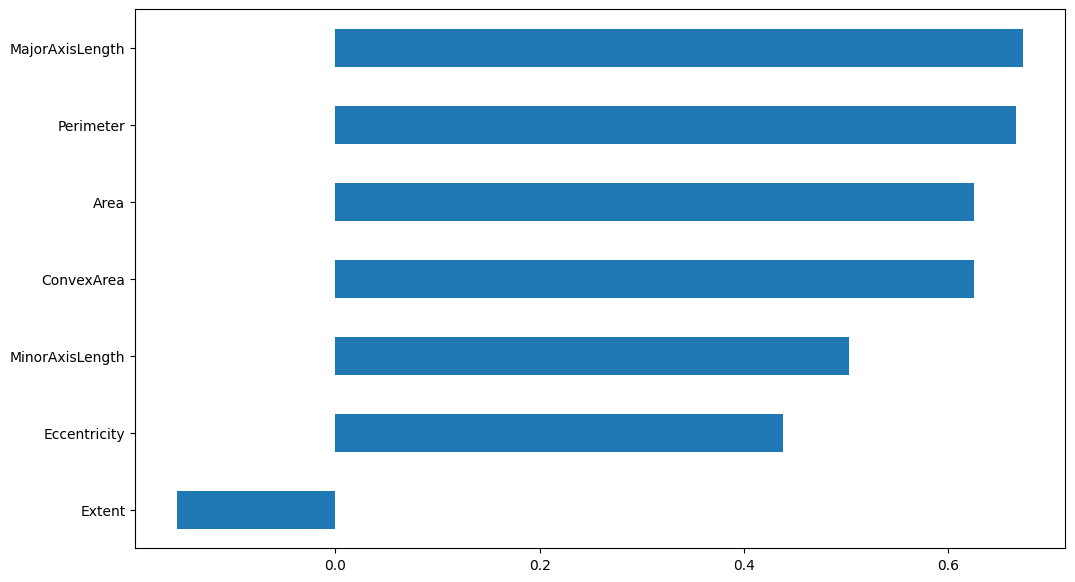

In [15]:
# Let's look at the relationship between features and target variable with the help of a graph;

df.corr()["Class"].drop("Class").sort_values().plot.barh()
plt.show()

* In this graph, it is seen that the features with the highest relationship with the target variable are 'MajorAxisLength', 'Perimeter' (0.66), 'Area' and 'ConvexArea'. 

* 'Extend' has a negative relationship with target variable. 

### Data Visulation

#### Pairplot

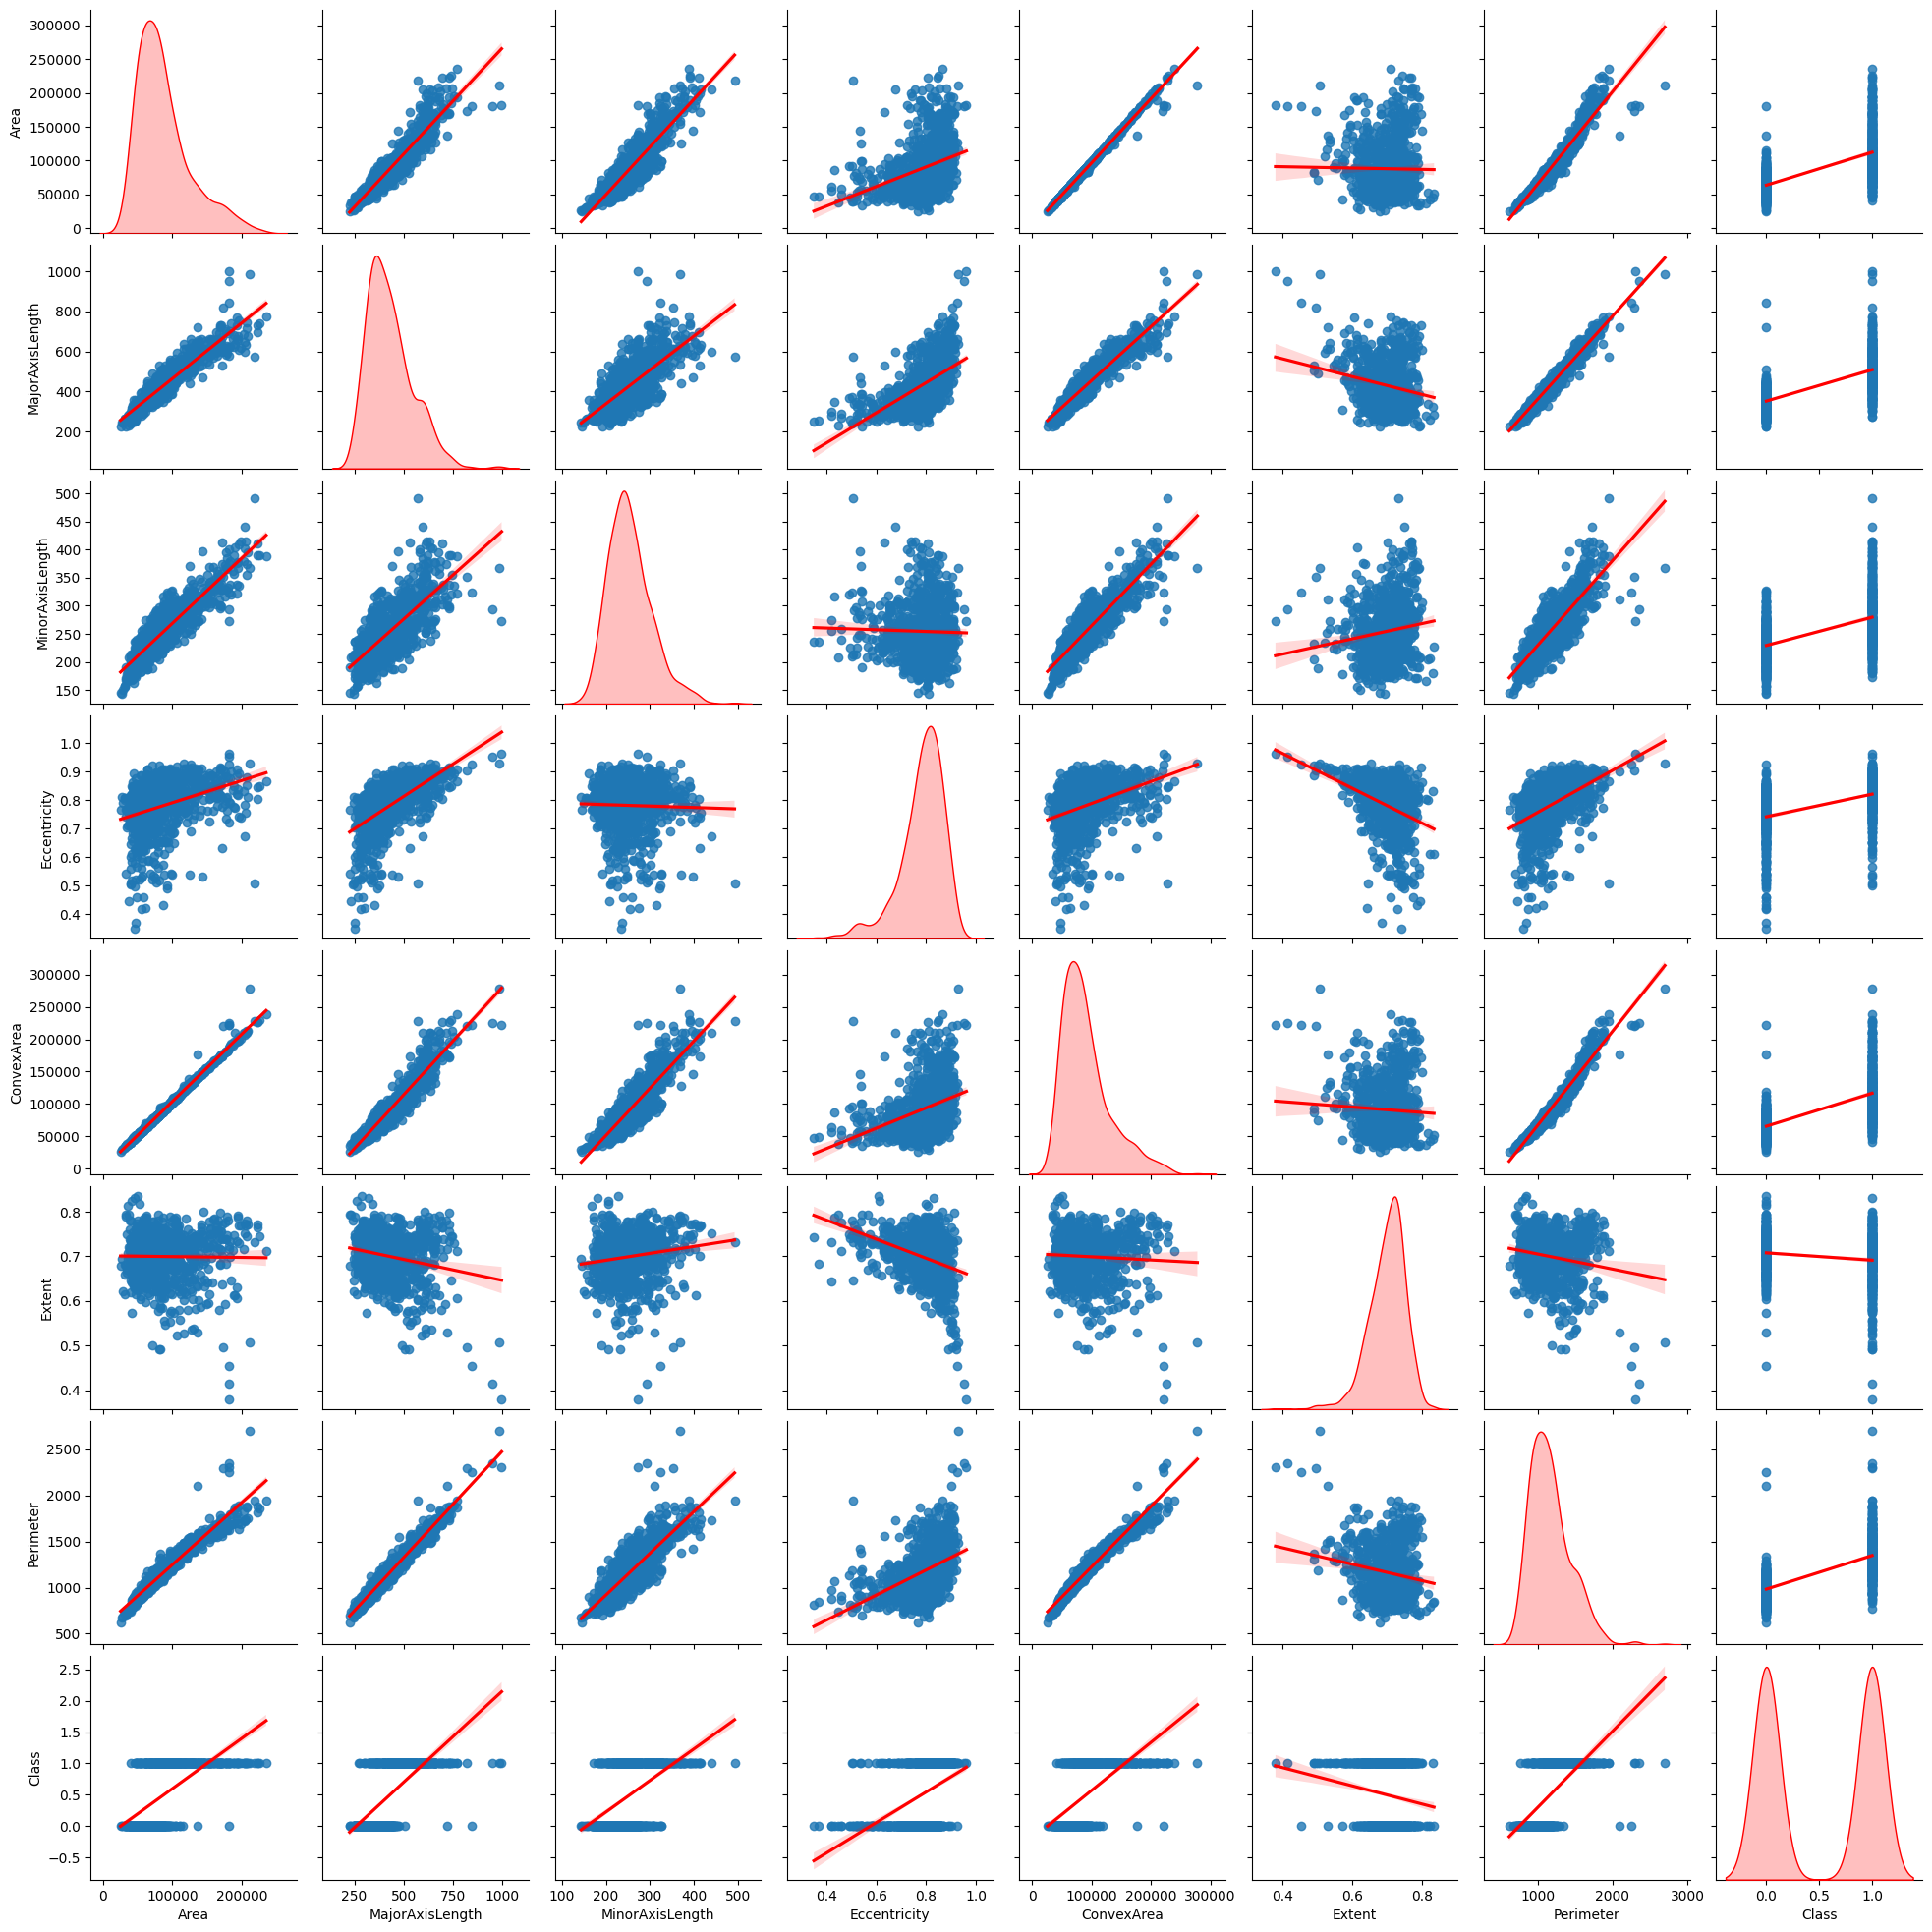

In [16]:
sns.pairplot(df, kind = "reg", diag_kind = "kde", diag_kws={"color":"red"}, plot_kws={"line_kws":{"color":"red"}});

* Tehere are right skiwness in the "Area", 'MajorAxisLength', 'MinorAxisLength', 'ConvexArea',  'Perimeter' 
* and left right skiwness in the 'Eccentricity' and 'Extent'.

**Sagdan carpik olanlarda Logaritma almak yararli olabiliyor. 
Soldan carpiklara baska bir mudahale gerekir.** 

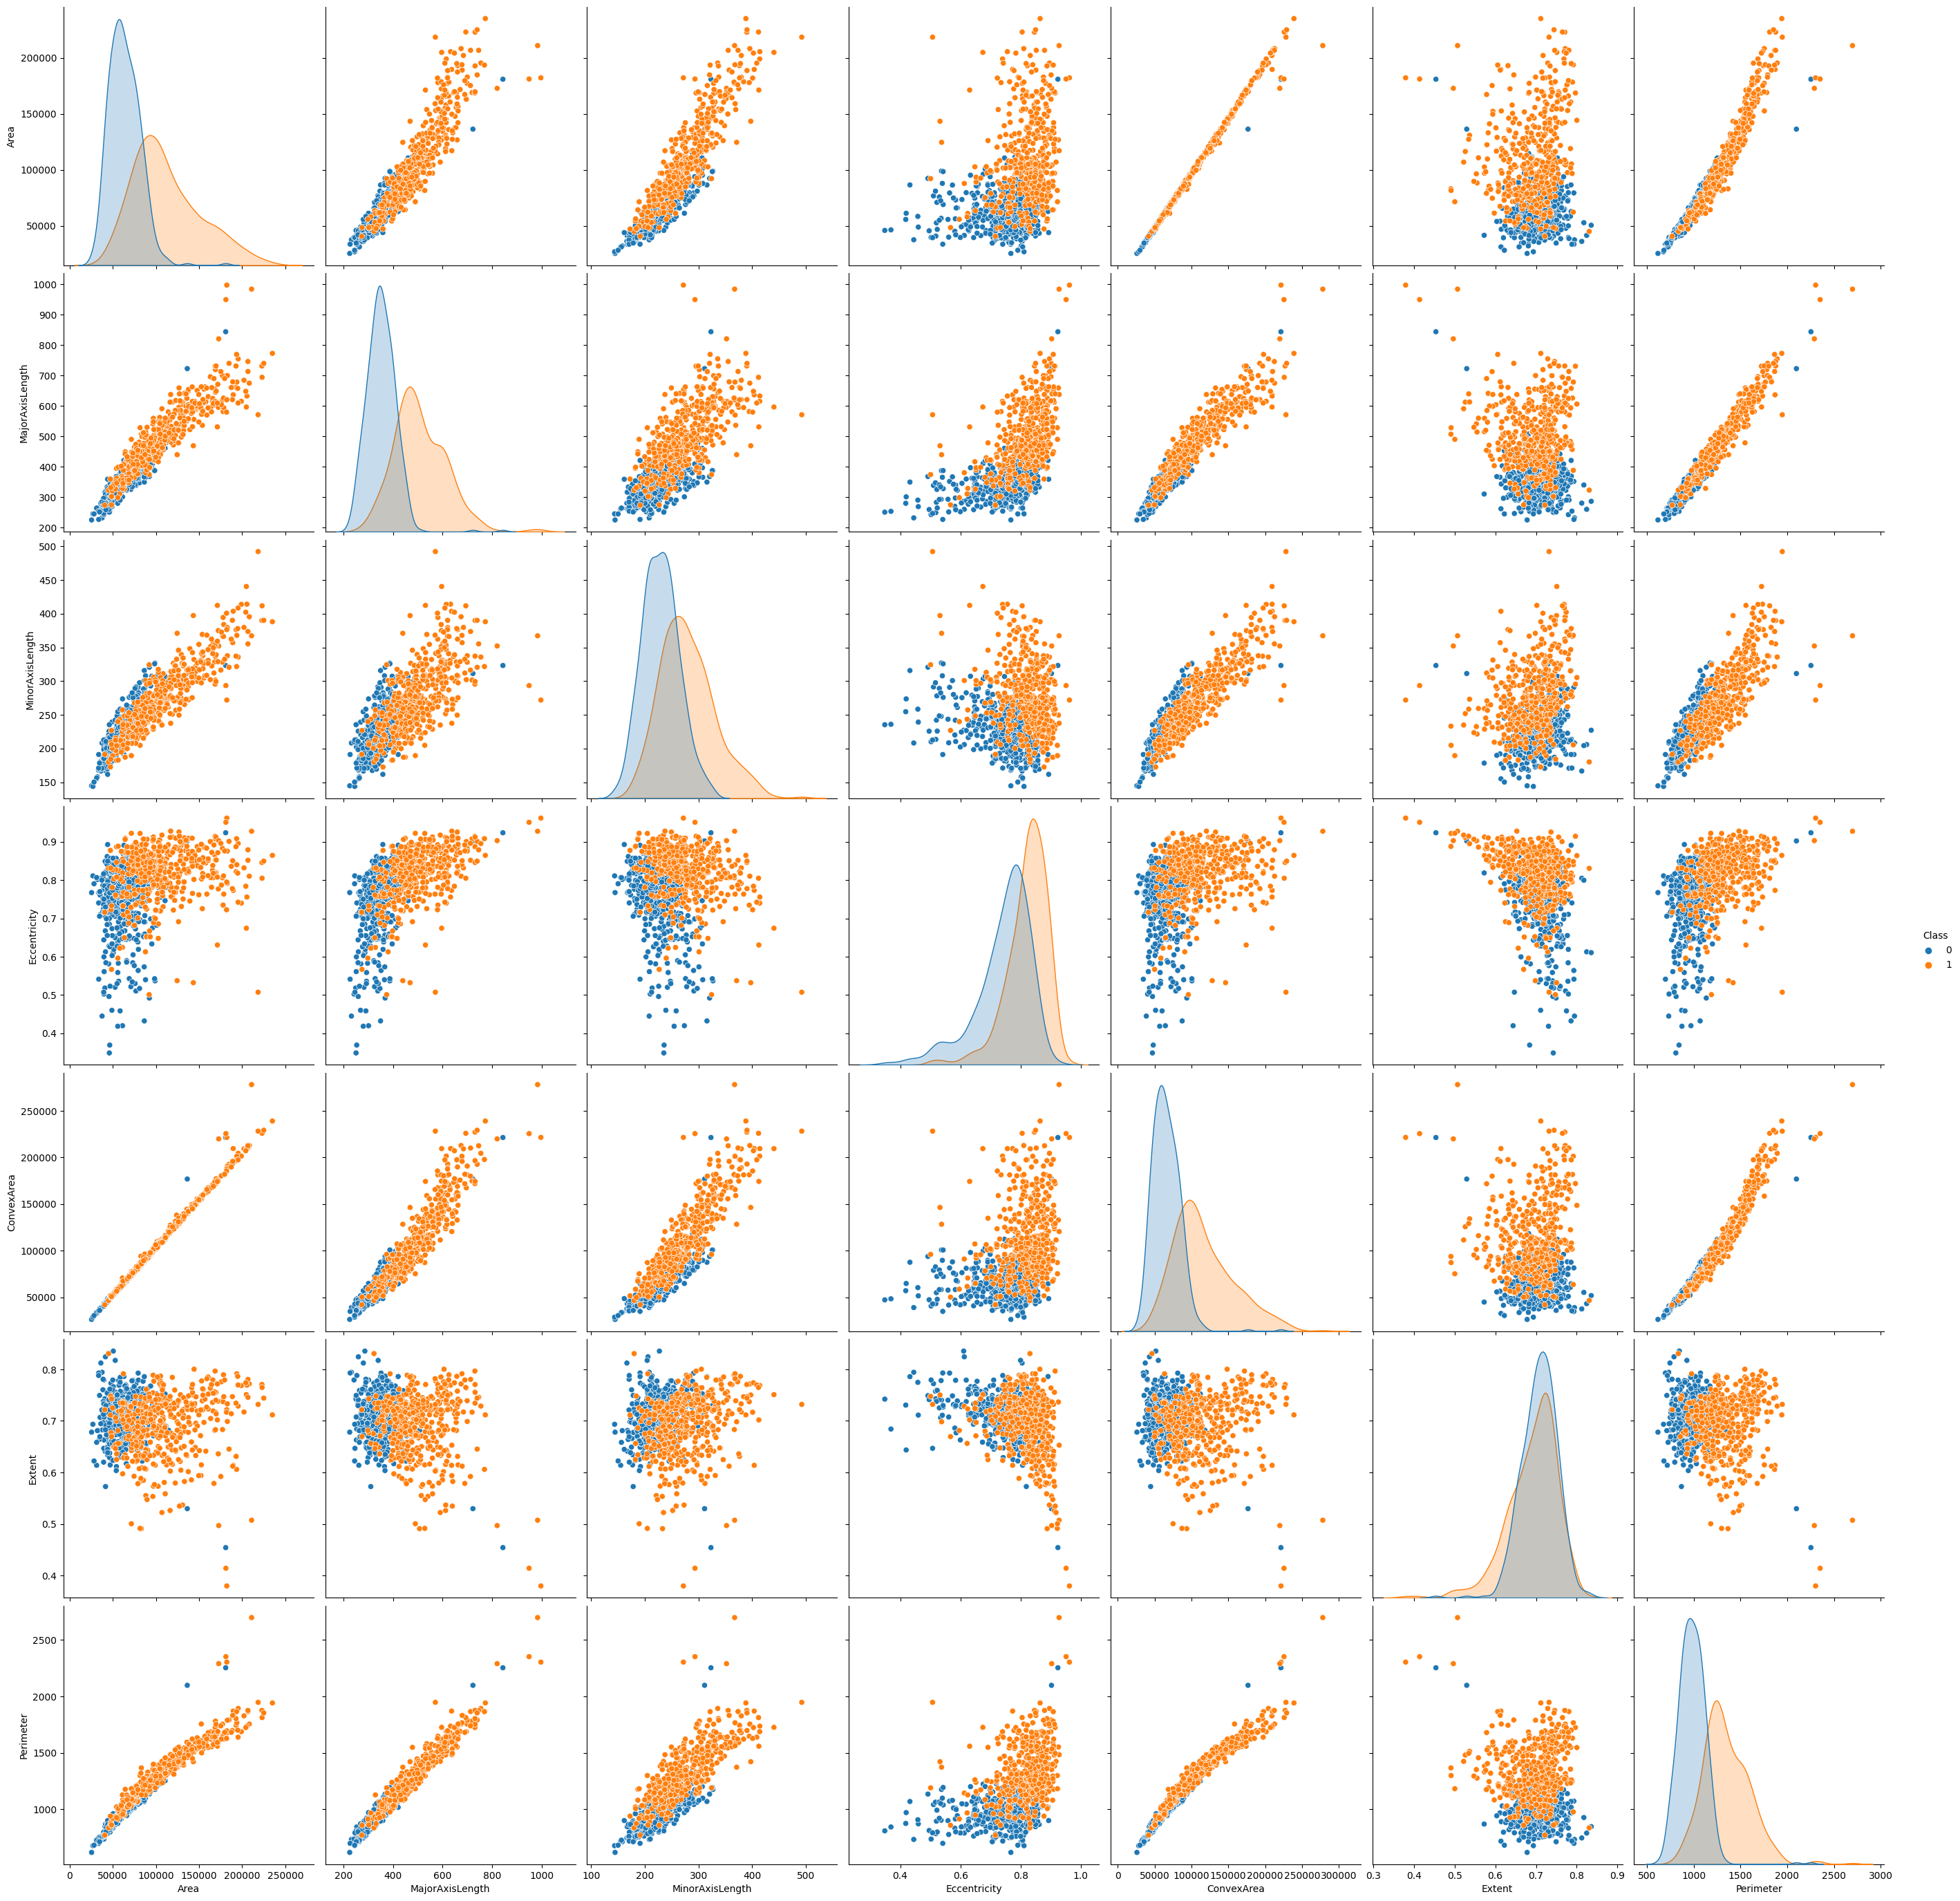

In [17]:
sns.pairplot(data=df, hue="Class", height=4, aspect =1);

#### Scatter Plot

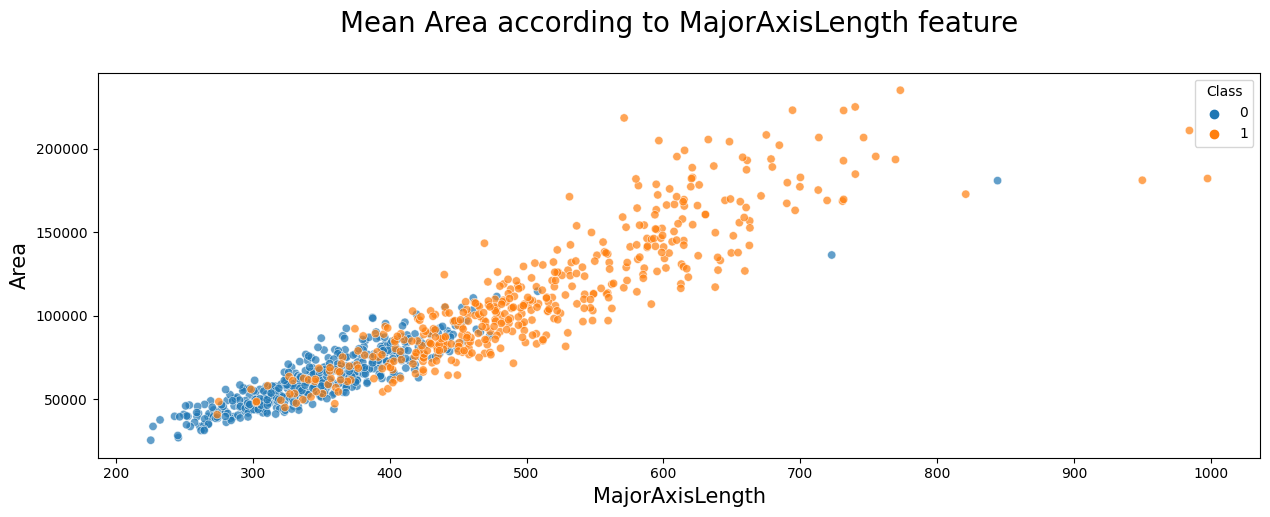

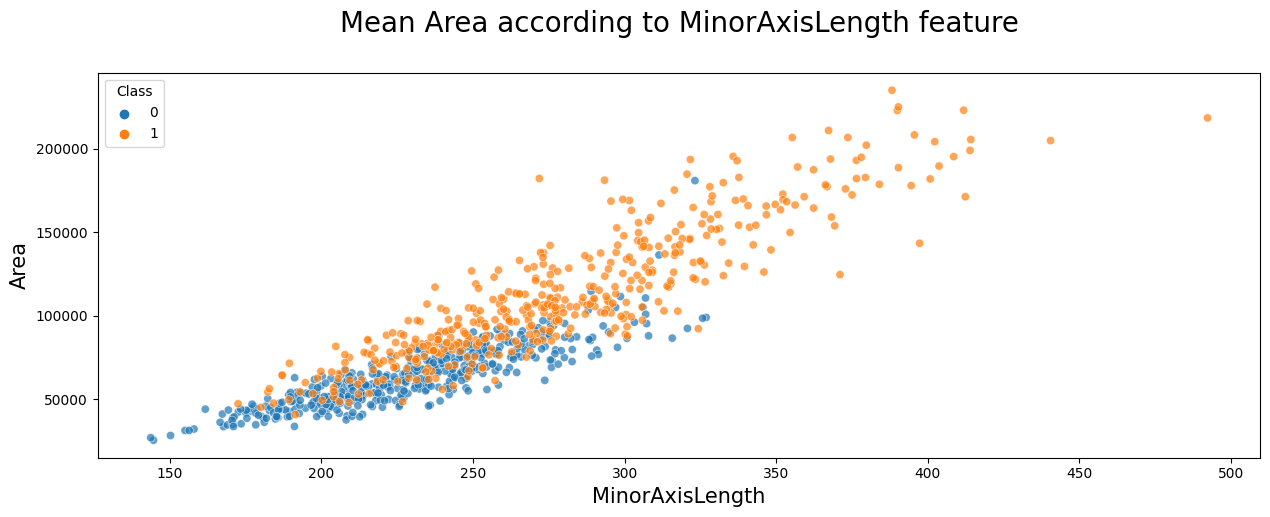

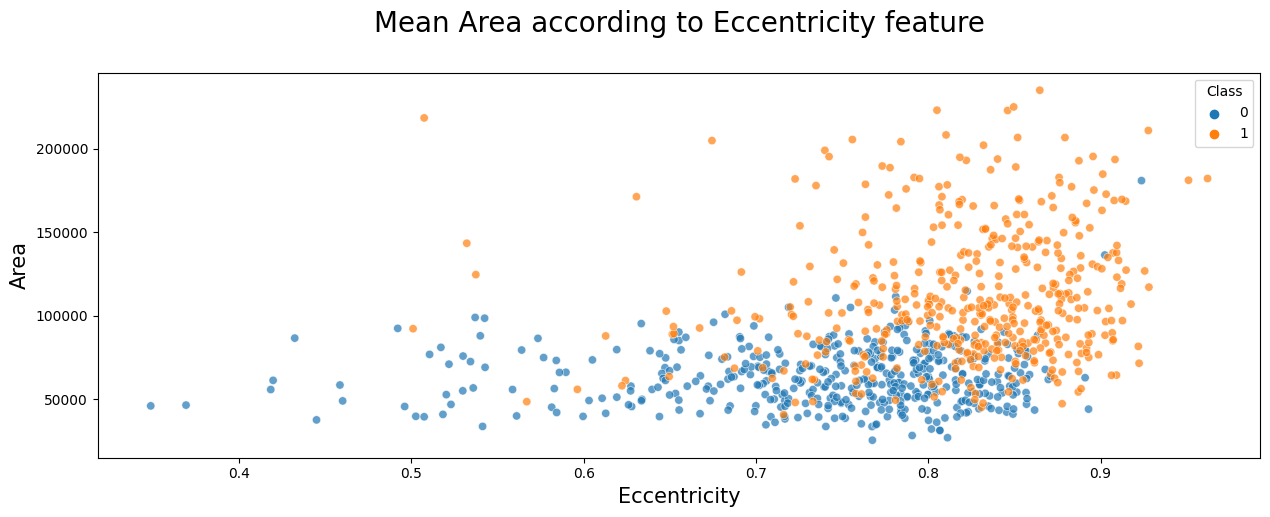

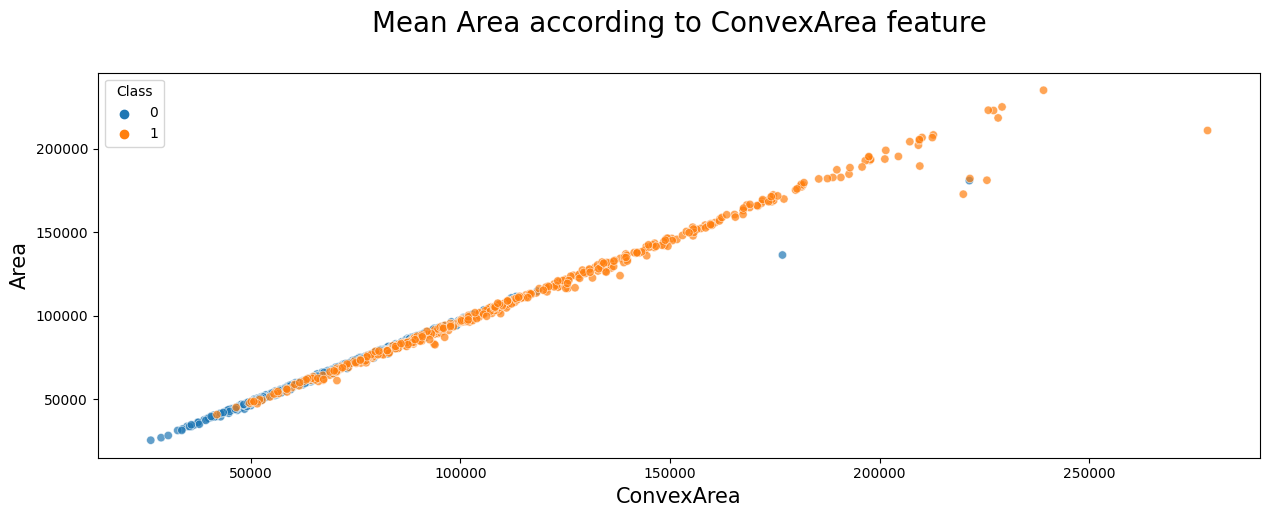

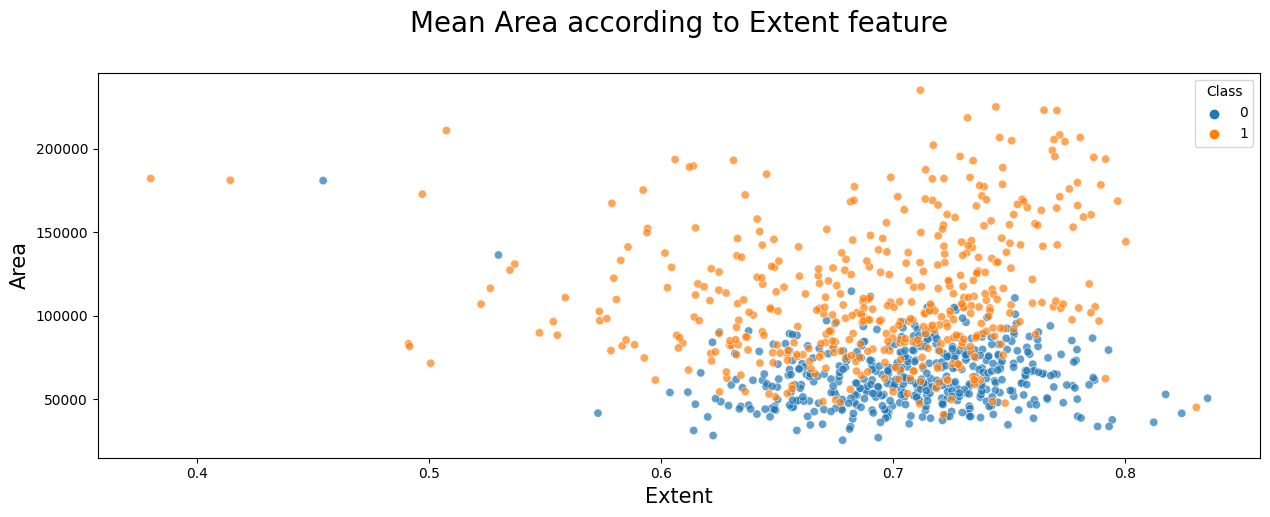

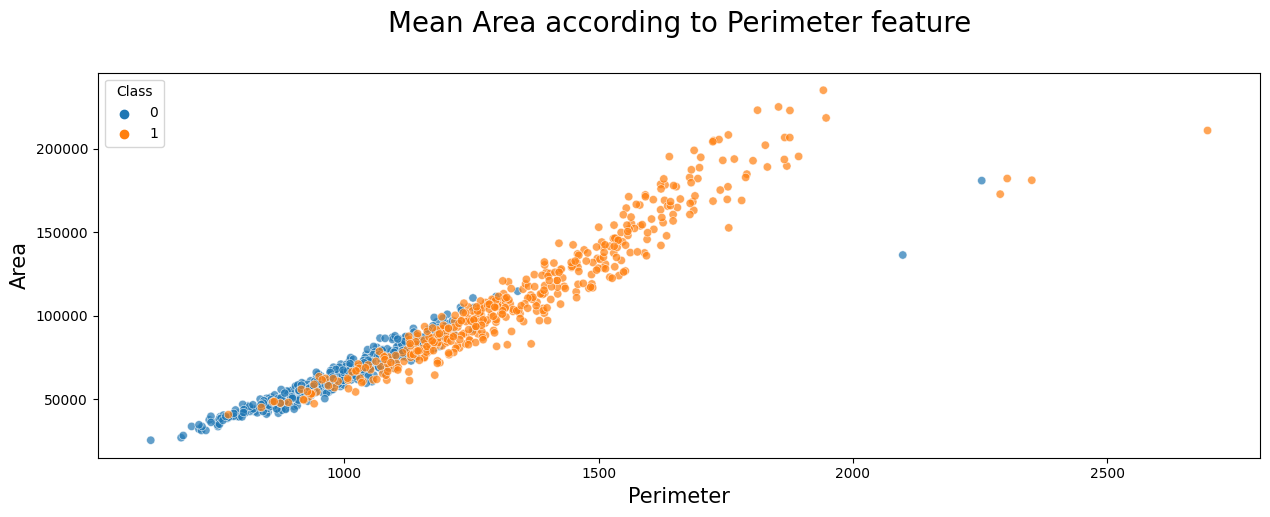

In [18]:
def explore_cat_feature(feature):
    plt.figure(figsize=[15, 5])
    sns.scatterplot(x=feature, y='Area', hue='Class', data=df, alpha=0.7)
    plt.xlabel(feature, fontsize=15)
    plt.ylabel('Area', fontsize=15)
    plt.title("Mean Area according to {} feature\n".format(feature), fontsize=20)
    plt.show()

for feature in ['MajorAxisLength', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'Extent', 'Perimeter']:
    explore_cat_feature(feature)

* It is observed that Besni raisins are larger than Kecimen raisins. 
* There are no Besni raisins with a MajorAxisLength less than 270 and no Kecimen raisins with a MajorAxisLength greater than 850. 
* There are also 2 large Kecimen raisins in the sampler, which can be considered as outliers.  
* ConvexArea is a good feature for the model and we would expect the model to be able to easily discriminate between dried fruit varieties using this variable. Those with a small ConvexArea are usually Kecimen and those with a large one are Besni raisins.  

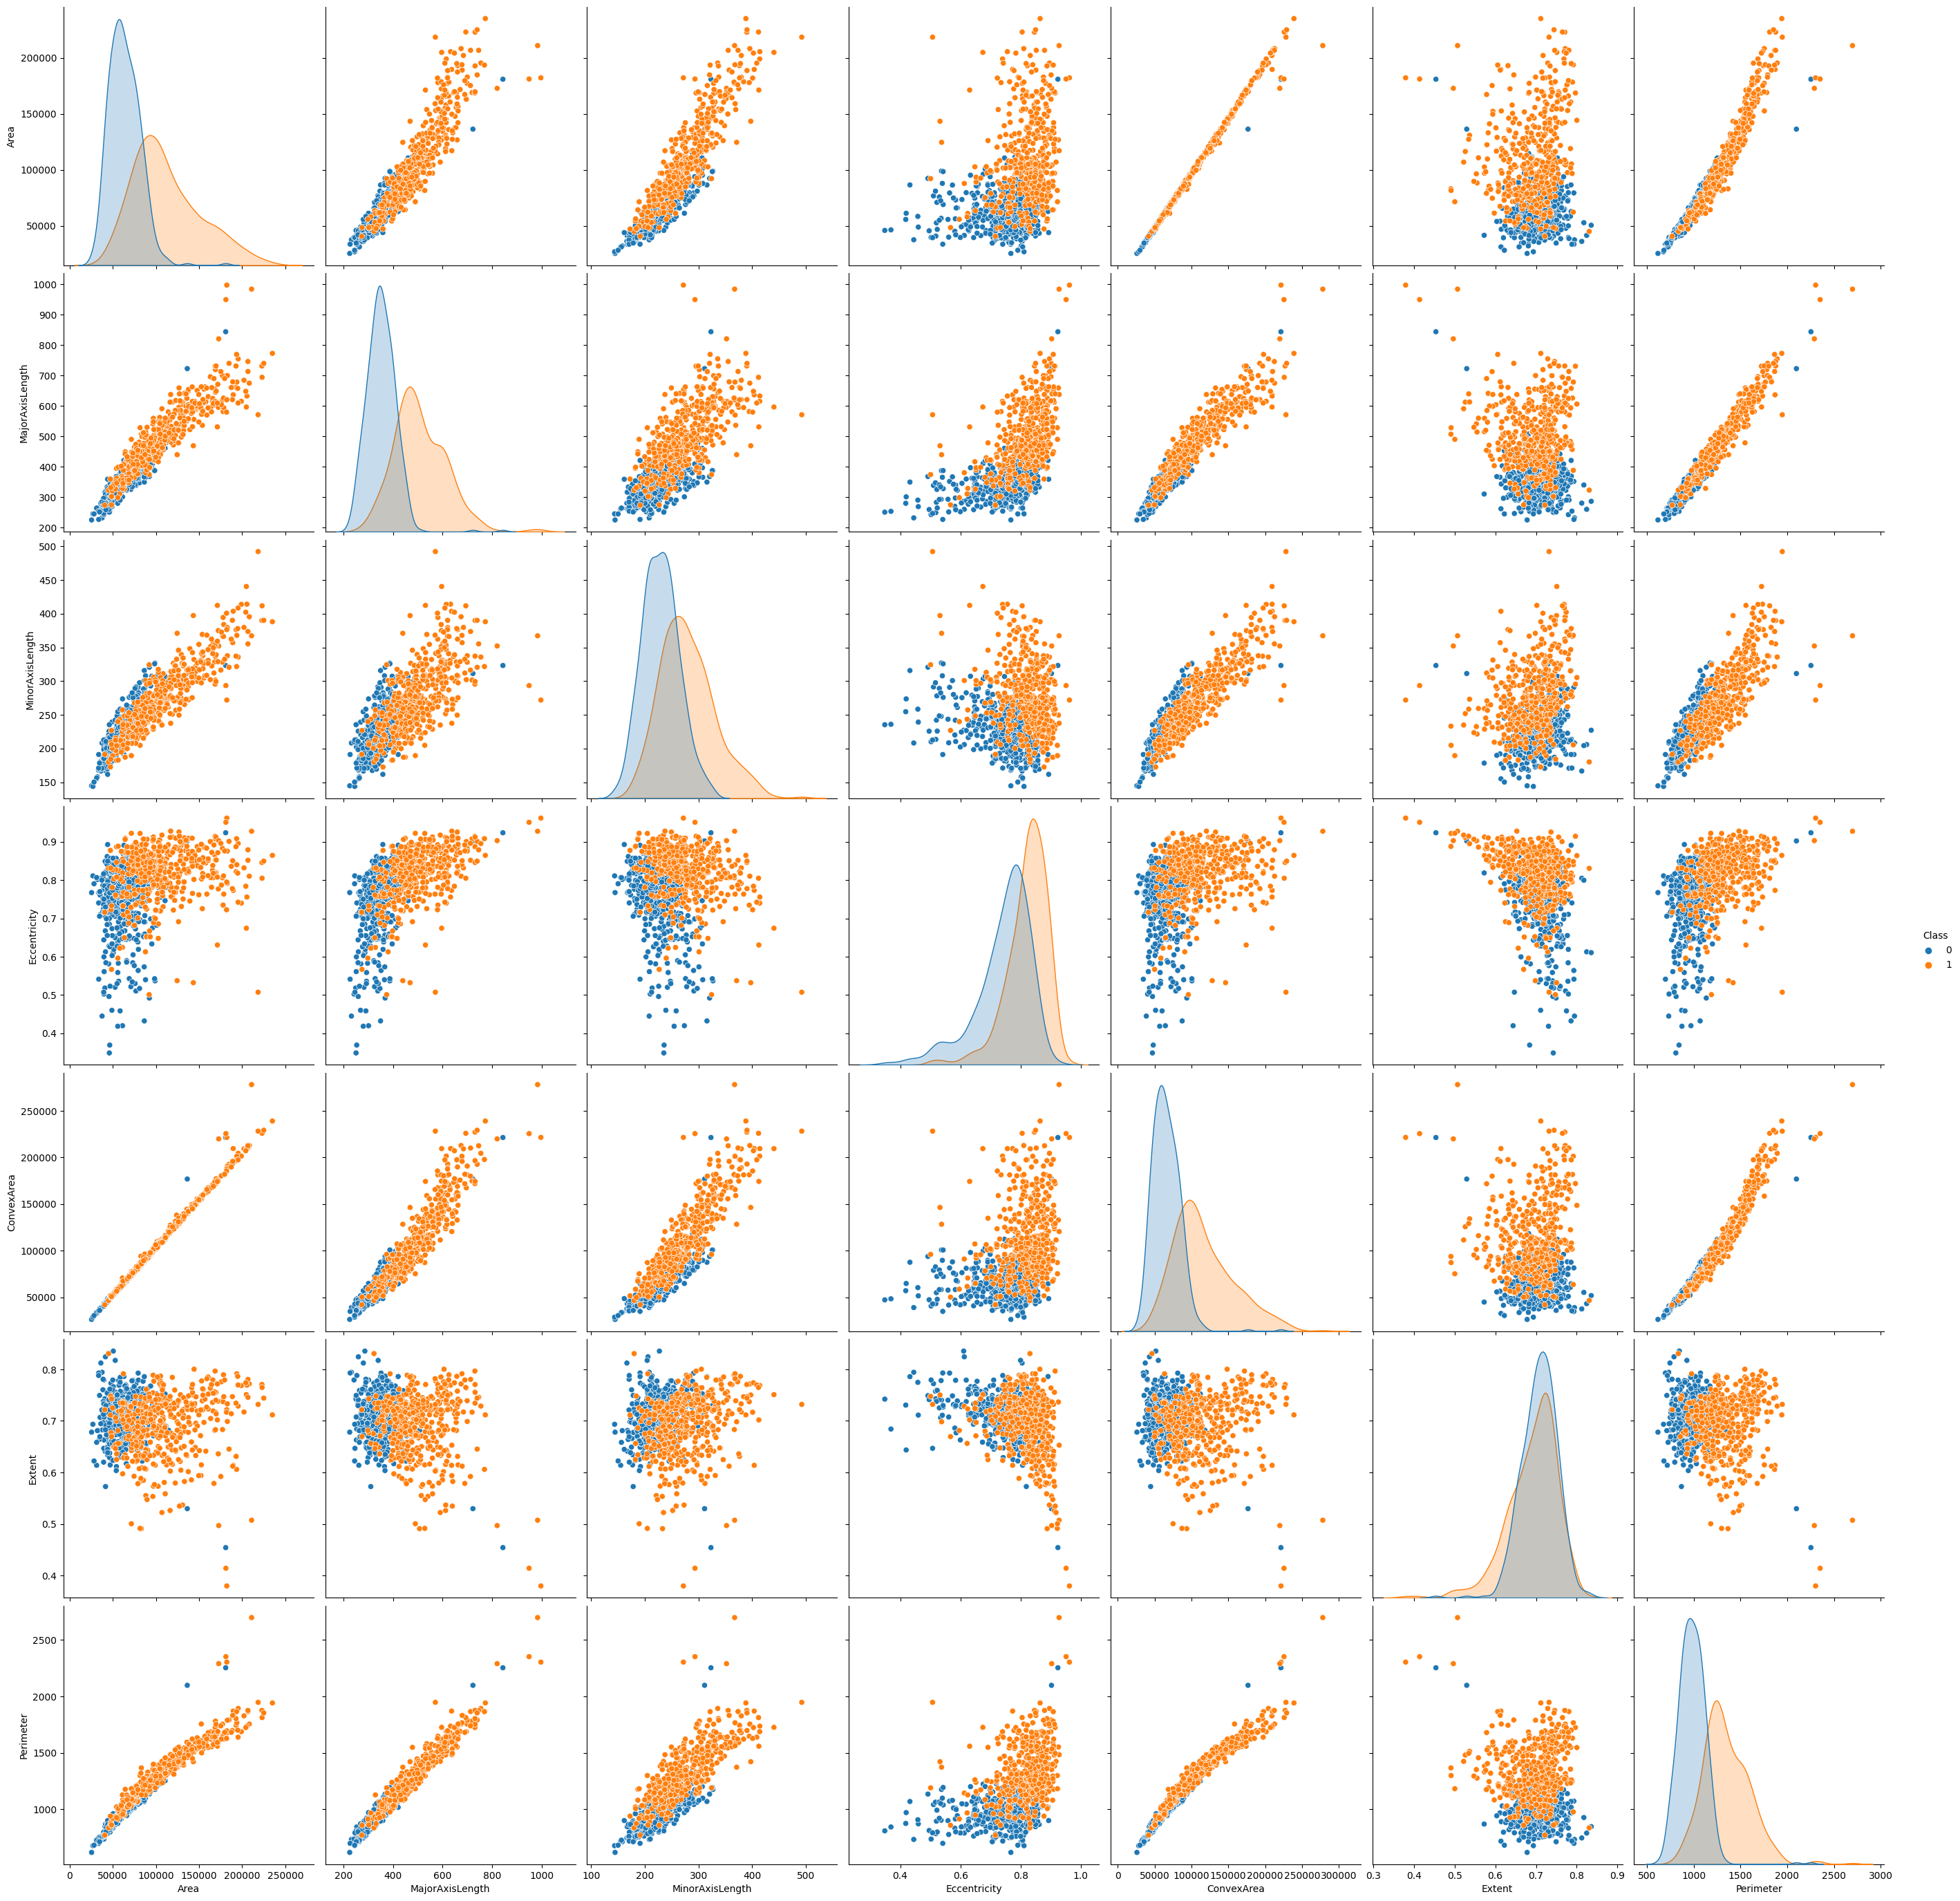

In [19]:
sns.pairplot(data=df, hue="Class", height=4, aspect =1);

*  In this graph, it can be seen that the dried grape varieties are so intermingled that it will be difficult for the model to separate them. 

#### 3D Figures

Let's also draw 3D graphs, considering that 2D graphs may mislead us about the gradient of the data;

In [20]:
# %matplotlib inline
# %matplotlib notebook

In [21]:
# For default settings of figures; 

plt.rcParams.update(plt.rcParamsDefault)

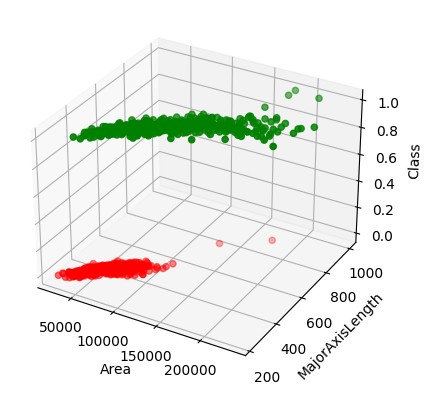

In [22]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.colors as mcolors

# Set colours by classes with ListedColormap
cmap = mcolors.ListedColormap(['red', 'green'])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 3D scatter plot 
ax.scatter(df['Area'], df['MajorAxisLength'], df['Class'], c=df['Class'], cmap=cmap)

ax.set_xlabel('Area')
ax.set_ylabel('MajorAxisLength')
ax.set_zlabel('Class')

plt.show()

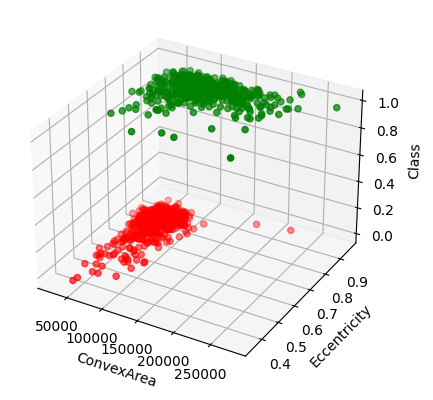

In [23]:
# Set colours by classes with ListedColormap
cmap = mcolors.ListedColormap(['red', 'green'])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 3D scatter plot 
ax.scatter(df['ConvexArea'], df['Eccentricity'], df['Class'], c=df['Class'], cmap=cmap)

ax.set_xlabel('ConvexArea')
ax.set_ylabel('Eccentricity')
ax.set_zlabel('Class')

plt.show()

* The data that appear to be intertwined in the 2D graph are separated from each other in the 3D graph. 

* This will increase the prediction performance of the model. 

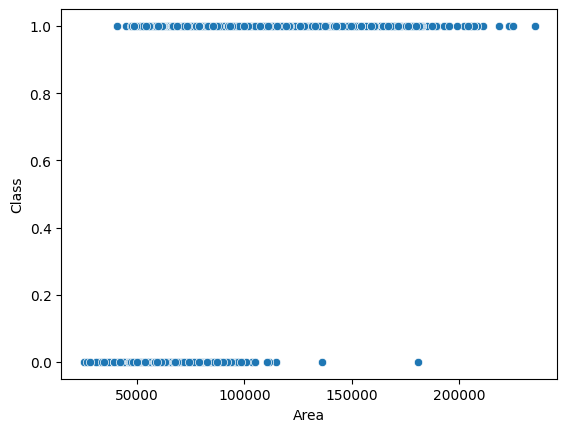

In [24]:
sns.scatterplot(x='Area', y='Class', data=df)
plt.show()

* As can be seen from this graph, the function that best represents these points is the Sigmoid Function, and therefore the analysis should be carried out using the Logistic Regression Model. 

### Outliers Check

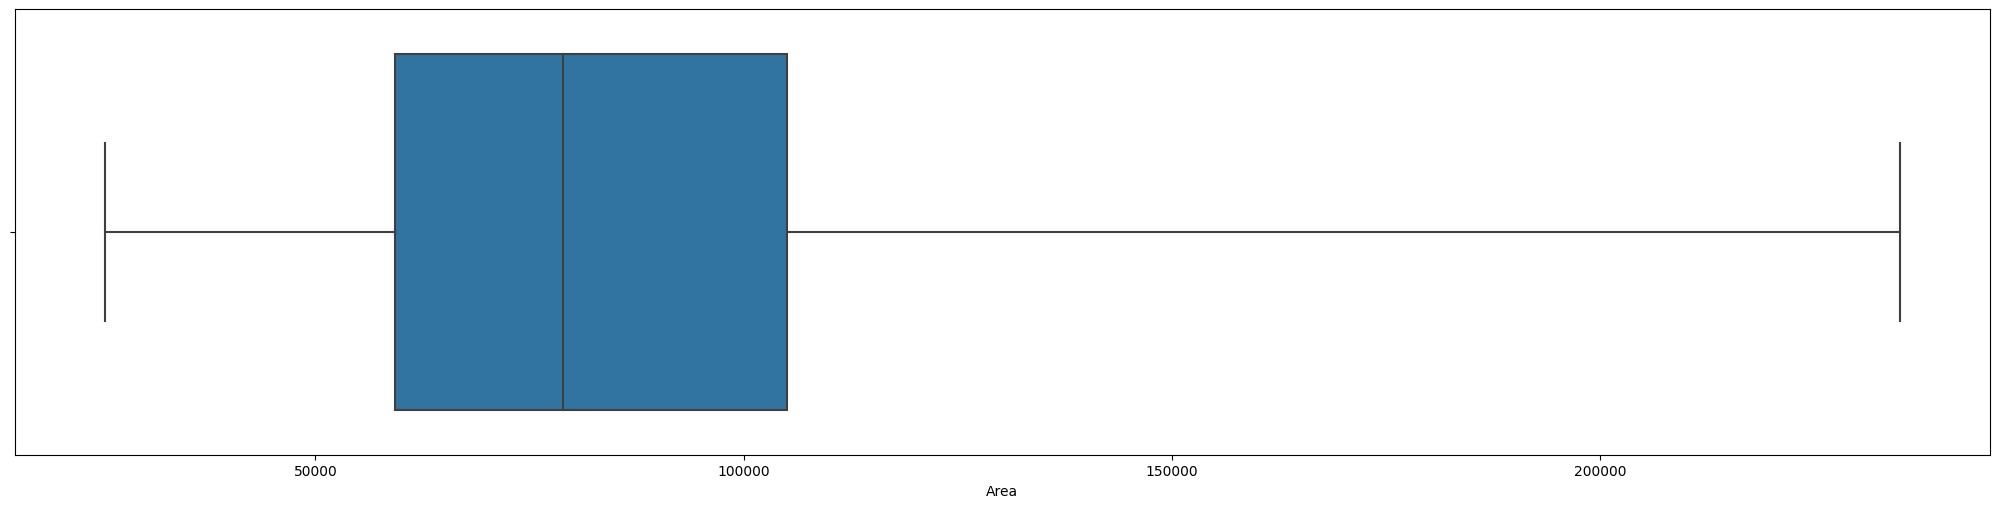

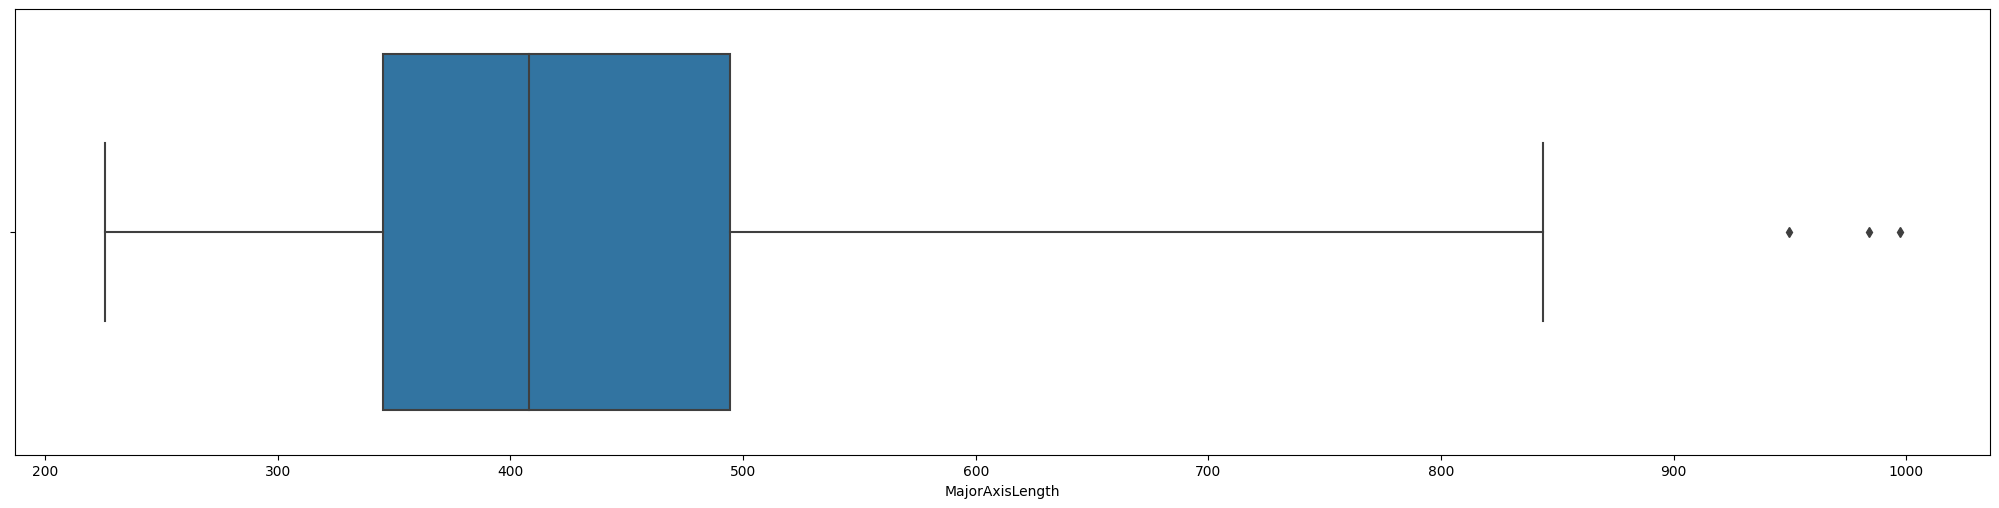

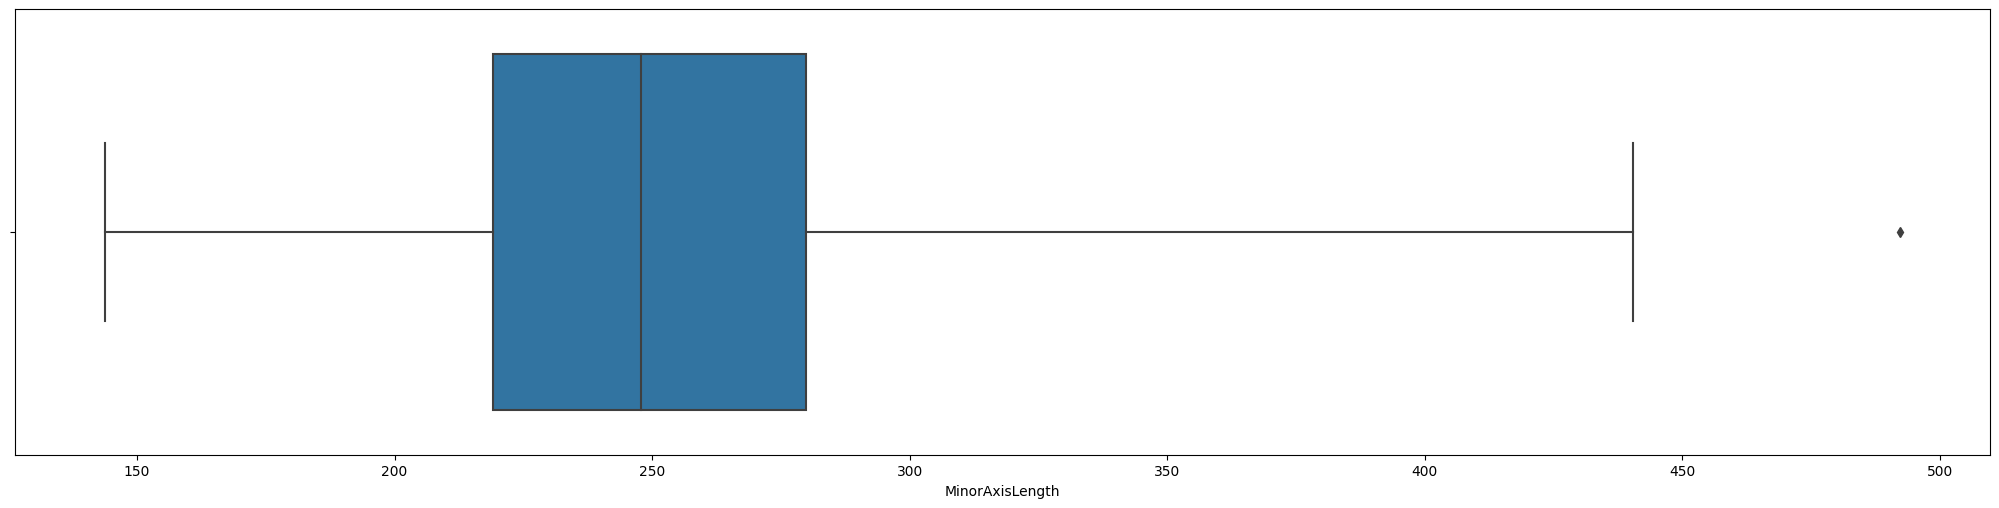

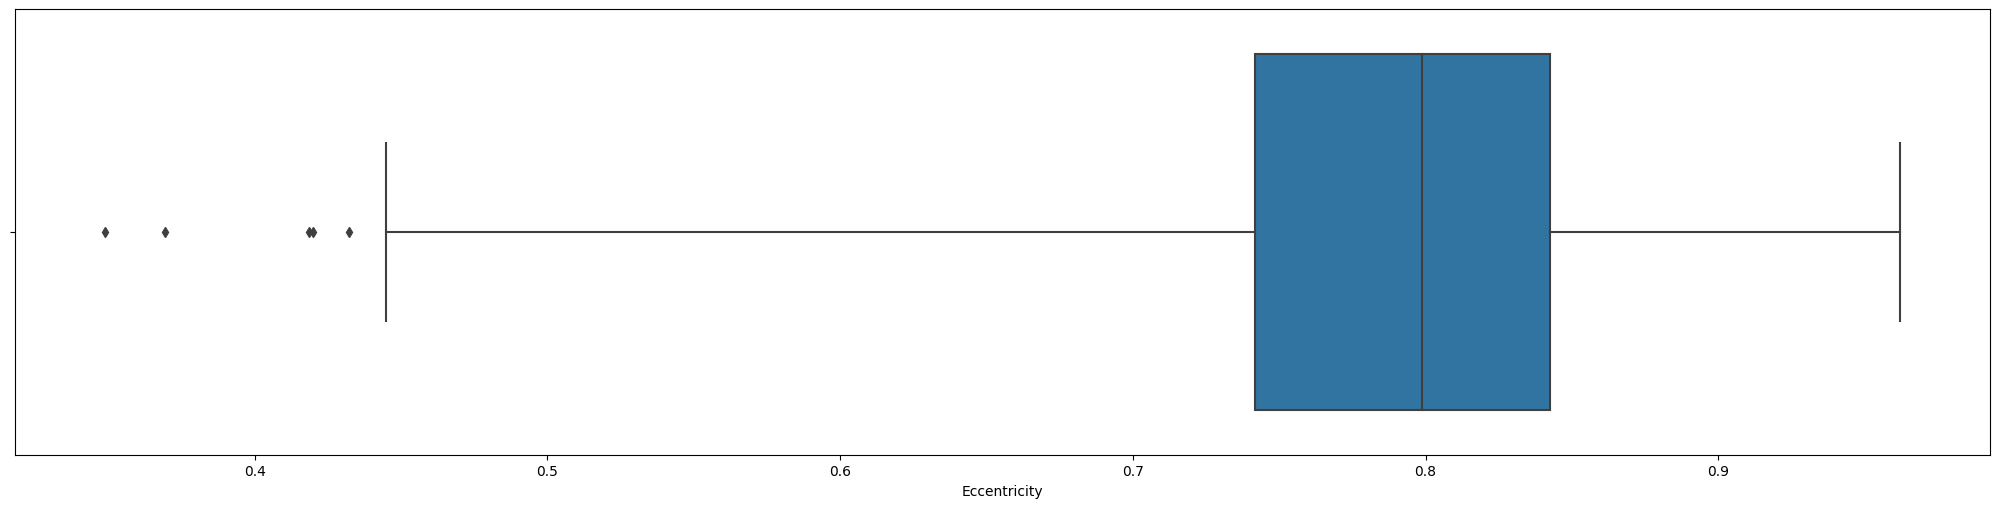

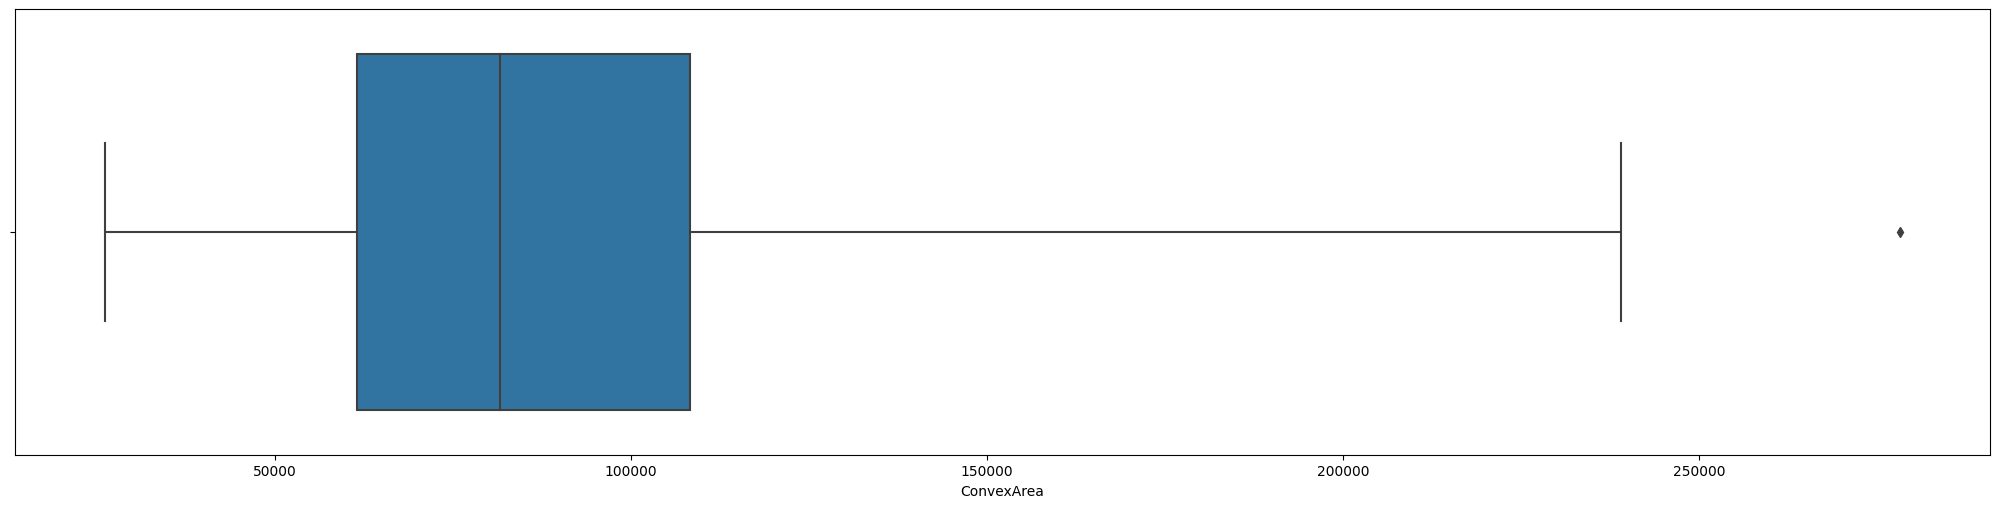

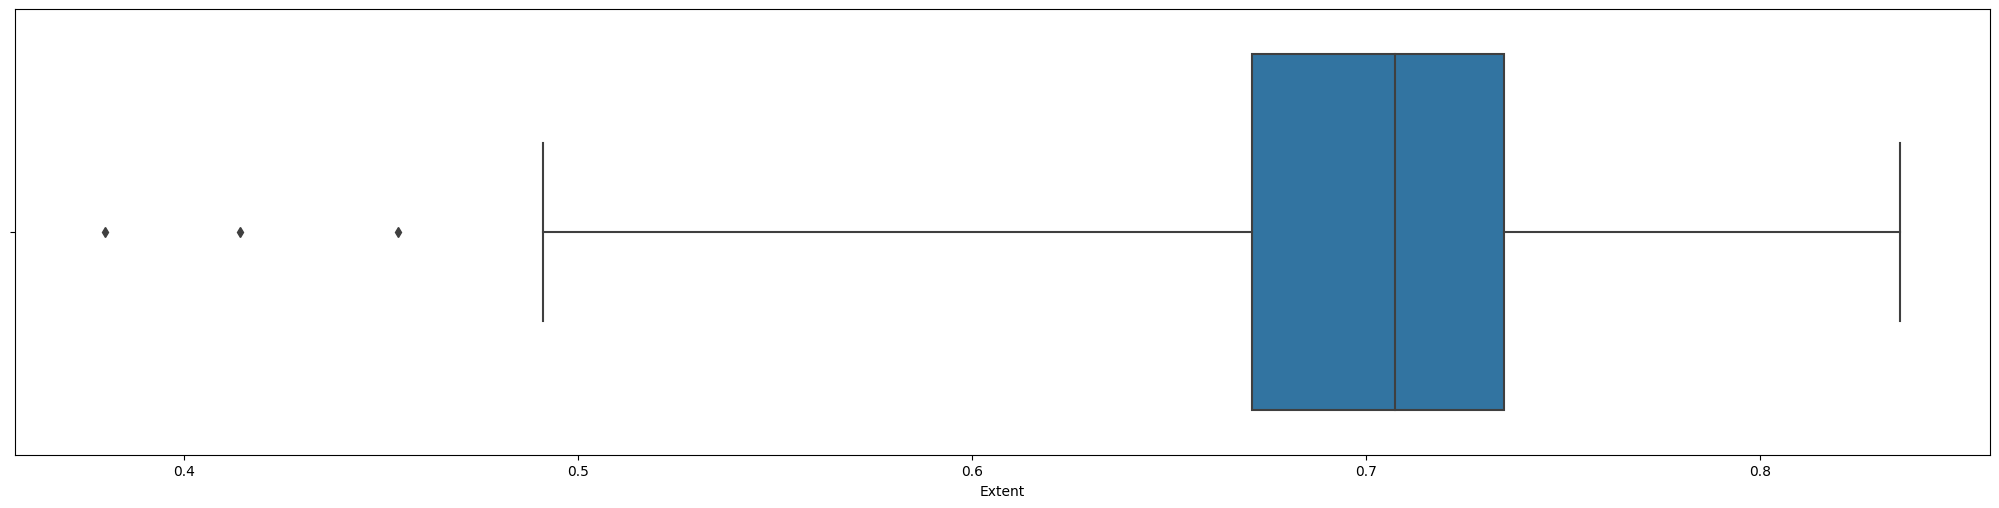

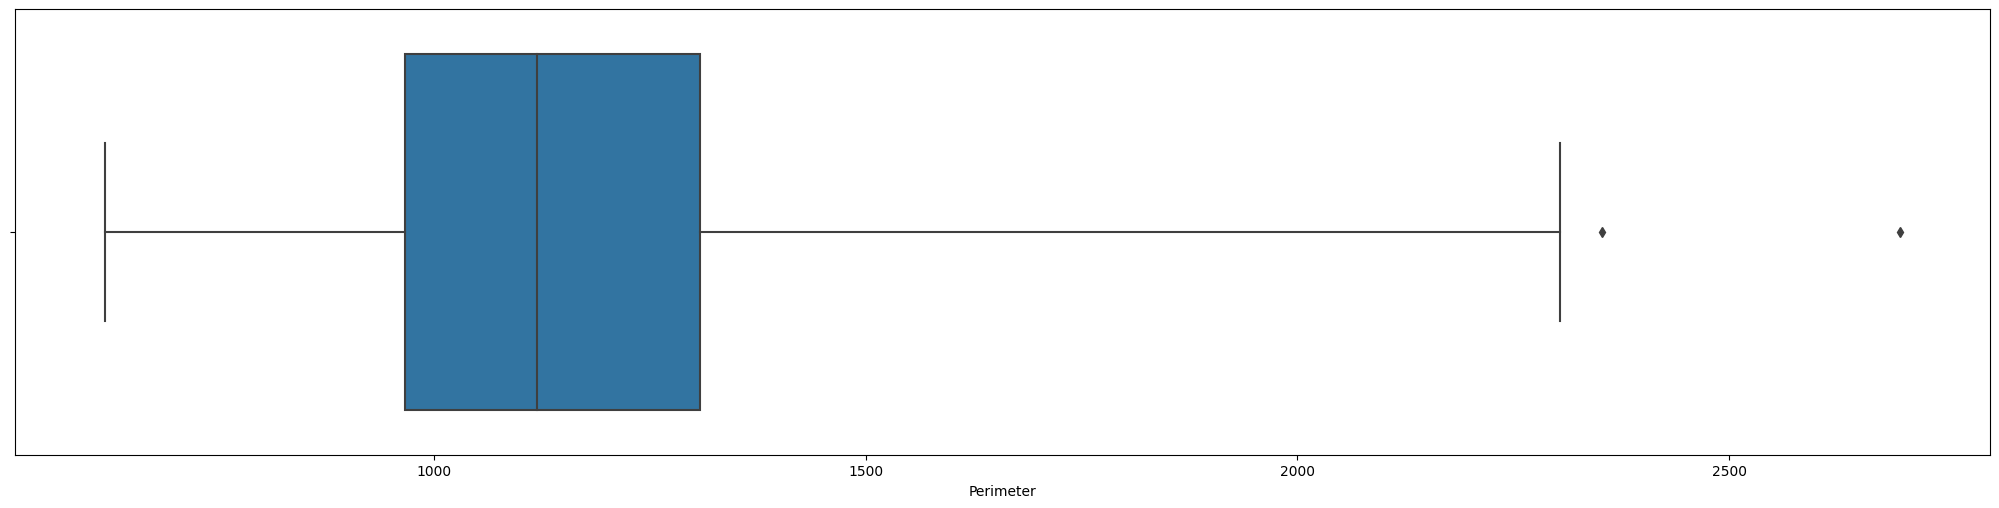

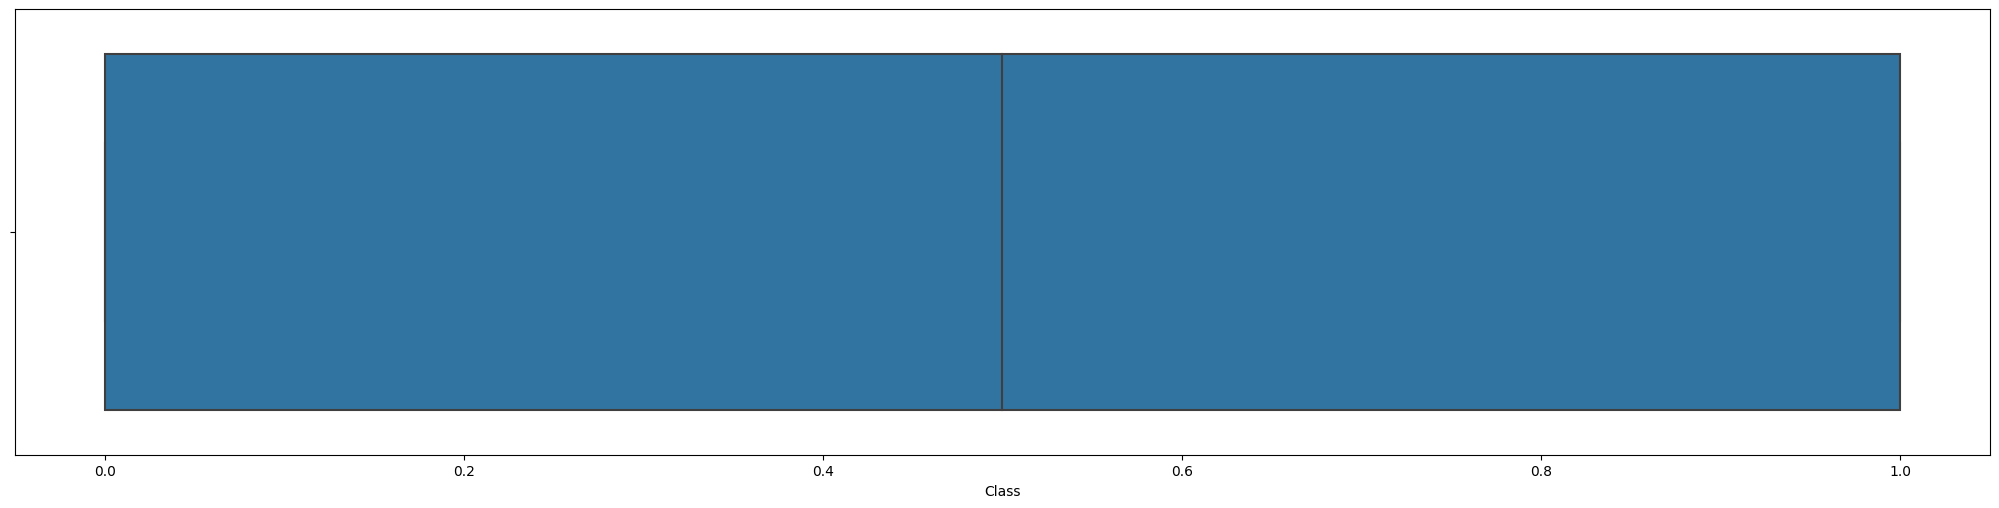

In [25]:
# Let's draw boxplots and histplots for checking distributions of features;
index=0
for feature in df.select_dtypes('number').columns:
    index+=1
    plt.figure(figsize=(40,40))
    plt.subplot((len(df.columns)),2,index)
    sns.boxplot(x=feature,data=df, whis=3) 
        
    plt.tight_layout()
    
    plt.show()

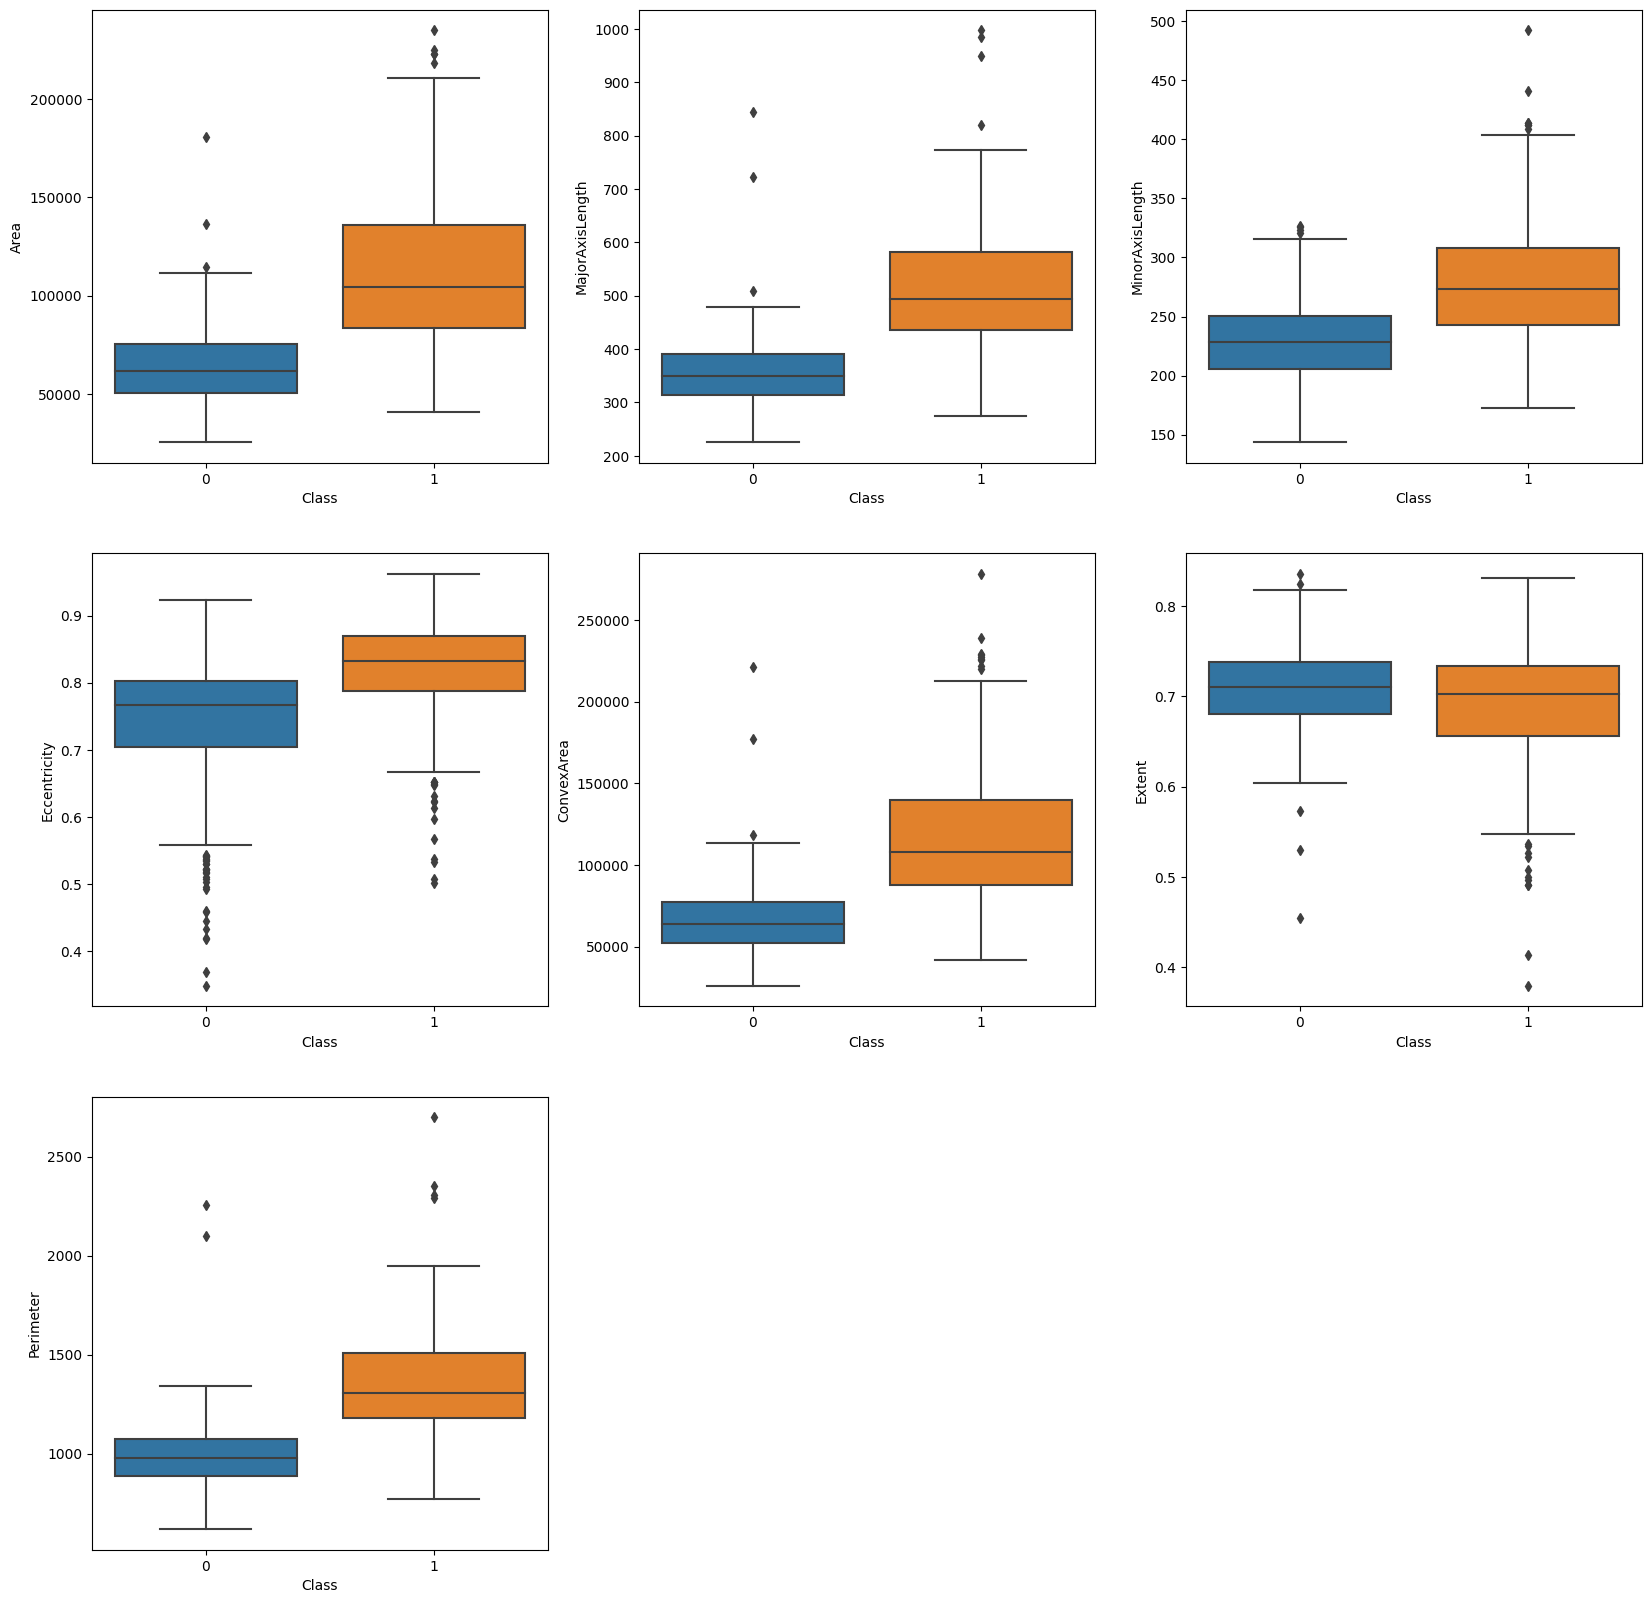

In [26]:
# We can also analyse this situation with target variable separation;

index = 0
plt.figure(figsize=(20,20))
for feature in df.columns:
    if feature != "Class":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='Class',y=feature,data=df)
plt.show()   

* There are a little outlier in data set. 

## Labelling  

In [27]:
X = df.drop(["Class"], axis=1)
y= df["Class"]

In [28]:
X

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0    87524          442.246          253.291         0.820       90546   
1    75166          406.691          243.032         0.802       78789   
2    90856          442.267          266.328         0.798       93717   
3    45928          286.541          208.760         0.685       47336   
4    79408          352.191          290.828         0.564       81463   
..     ...              ...              ...           ...         ...   
895  83248          430.077          247.839         0.817       85839   
896  87350          440.736          259.293         0.809       90899   
897  99657          431.707          298.837         0.722      106264   
898  93523          476.344          254.176         0.846       97653   
899  85609          512.082          215.272         0.907       89197   

     Extent  Perimeter  
0     0.759   1184.040  
1     0.684   1121.786  
2     0.638   1208.575  
3     0.700    844.162  
4     0.793   1073.251  
..      ...        ...  
895   0.669   1129.072  
896   0.636   1214.252  
897   0.741   1292.828  
898   0.659   1258.548  
899   0.632   1272.862  

[900 rows x 7 columns]

In [29]:
y

0      0
1      0
2      0
3      0
4      0
      ..
895    1
896    1
897    1
898    1
899    1
Name: Class, Length: 900, dtype: int64

## Train | Test Split 

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [32]:
X_train.shape

(720, 7)

In [33]:
X_test.shape

(180, 7)

* 720 of the 900 observations were reserved for train, 180 for test. 

## Scaling

In [34]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()

In [35]:
X_train_scaled = scaler.fit_transform(X_train) # Fit and transfer the scaling to X_train.
X_test_scaled = scaler.transform(X_test) # Transfer the scaling to X_test 

* Our dataset ready to analysis

# Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
log_model = LogisticRegression()

In [38]:
# Let's fit the model;

log_model.fit(X_train_scaled, y_train) # Training is completed.

LogisticRegression()

In [39]:
# Let's get estimates for the test data; 

y_pred = log_model.predict(X_test_scaled)
y_pred 

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0], dtype=int64)

* It gave us 0's and 1's. The node assigns the ones close to 0 to 0 and the ones close to 1 to 1. 

* A calculation of probability is being made in the background.

In [40]:
# Let's get the odds (). I want to see the probabilities of 0 (Kecimen Raisin, on the first coulmn) 1 (Besni Raisin, on the second coulmn) and . 

y_pred_proba = log_model.predict_proba(X_test_scaled) 
y_pred_proba

array([[7.56122893e-01, 2.43877107e-01],
       [2.61795091e-01, 7.38204909e-01],
       [2.26244543e-03, 9.97737555e-01],
       [2.16597596e-01, 7.83402404e-01],
       [1.12689412e-01, 8.87310588e-01],
       [9.04391084e-01, 9.56089163e-02],
       [1.09120207e-01, 8.90879793e-01],
       [8.26101574e-01, 1.73898426e-01],
       [3.84534970e-01, 6.15465030e-01],
       [4.82207634e-01, 5.17792366e-01],
       [2.87290994e-02, 9.71270901e-01],
       [4.84506550e-01, 5.15493450e-01],
       [2.77065637e-01, 7.22934363e-01],
       [3.60414853e-01, 6.39585147e-01],
       [9.15518855e-01, 8.44811454e-02],
       [7.42907071e-01, 2.57092929e-01],
       [9.71652952e-01, 2.83470479e-02],
       [9.60712562e-01, 3.92874383e-02],
       [7.94889623e-01, 2.05110377e-01],
       [6.24550525e-01, 3.75449475e-01],
       [9.35589120e-01, 6.44108803e-02],
       [5.44575898e-02, 9.45542410e-01],
       [8.64789816e-04, 9.99135210e-01],
       [6.05817770e-07, 9.99999394e-01],
       [8.854441

In [41]:
# I want to compare actual values (y_test), and my models' results;

my_dict = {"y_test": y_test, "Probability of Besni": y_pred_proba[:,1], "y_pred": y_pred}
compare = pd.DataFrame(my_dict)
compare

y_test  Probability of Besni  y_pred
184       0                 0.244       0
532       1                 0.738       1
501       1                 0.998       1
517       1                 0.783       1
871       1                 0.887       1
..      ...                   ...     ...
616       1                 0.996       1
231       0                 0.035       0
620       1                 0.626       1
629       1                 0.755       1
154       0                 0.224       0

[180 rows x 3 columns]

**INTERPRET:** We can see Actual (y_test) values, model prediction probability and model prediction together.

*  The model correctly predicted the true value in both cases, with a 24 percent probability of 0 for the raisin at the index 184 and a 74 percent probability of 1 for the raisin at the index 532. 

In [42]:
# Observations not correctly predicted by the model;  

compare[compare["y_test"] != compare["y_pred"]]

y_test  Probability of Besni  y_pred
168       0                 0.615       1
408       0                 0.515       1
298       0                 0.640       1
635       1                 0.257       0
805       1                 0.375       0
693       1                 0.113       0
341       0                 0.564       1
139       0                 0.719       1
551       1                 0.451       0
798       1                 0.205       0
680       1                 0.283       0
846       1                 0.320       0
780       1                 0.466       0
885       1                 0.152       0
665       1                 0.466       0
728       1                 0.120       0
218       0                 0.540       1

In [43]:
len(compare[compare["y_test"] != compare["y_pred"]])

17

* The logistic Regression Model was mispredicted in 17 observations.    

## Model Performance

We can check model performance by using **Precision, Recall, Accuraccy and F1 scores**. 

In [44]:
# Let's import the "evaluation metrics" and "confusion_matrix" libraries  of the Logistic Regression Model; 

from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

In [45]:
# Let's get the confusion matrix;

confusion_matrix(y_test, y_pred) # confusion_matrix

array([[92,  6],
       [11, 71]], dtype=int64)

**INTERPRET:** The model mistakenly predicted 6 of the observations 1 when in reality they were 0. Similarly, 11 of the observations that were 1, in reality, were incorrectly predicted as 0. 

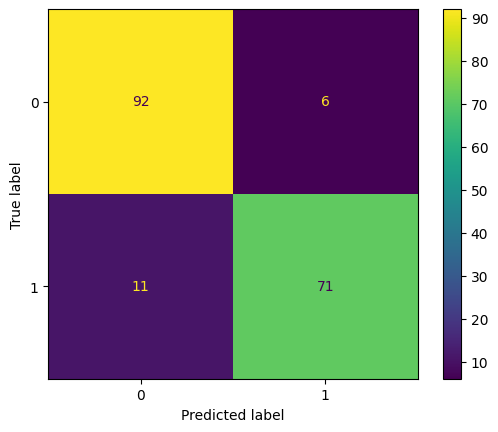

In [46]:
# Let's examine the confusion matrix visually;

plot_confusion_matrix(log_model, X_test_scaled, y_test)  # confusion_matrix visulation 
plt.show()

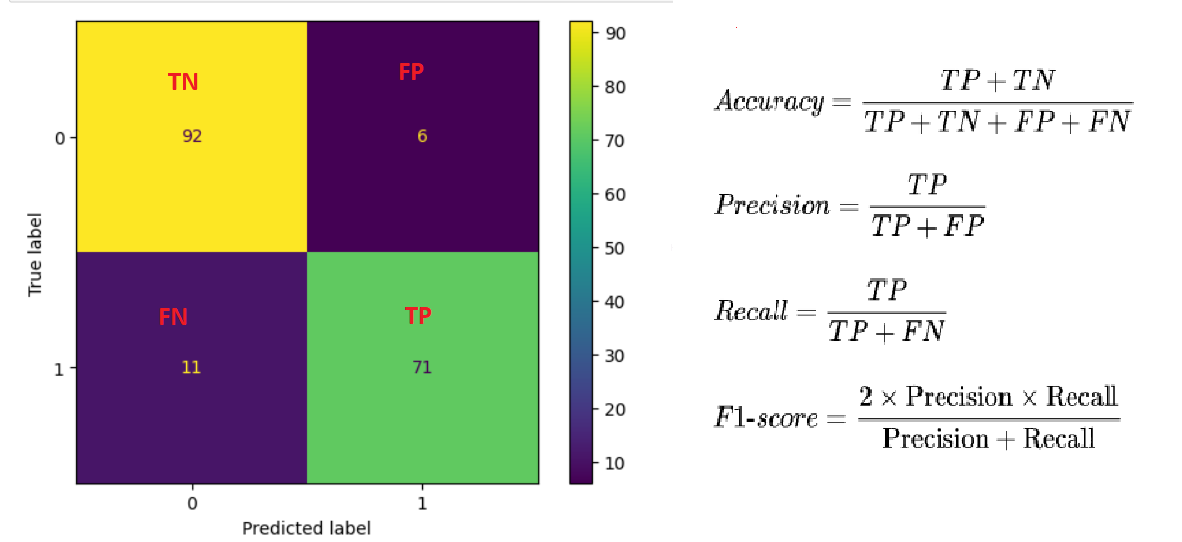

* Our model called the 6 observations (6 Kecimen raisin) correct (Besni raisin) when in reality they were wrong.

* Our model called the 11 observations (11 Besni raisins) correct (Kecimen raisin) when in reality they were wrong.

* Skorlari manuel olarak da uretebiliriz; 

    * **Accuracy**  = (92+71)/(92+6+11+71)      = 0.91
    * **Precision** = 71/(71+6)                 = 0.92
    * **Recall**    = 71/(71+11)                = 0.87
    * **F1**        = (2*0.92*0.86)/(0.92+0.86) = 0.89
    


In [47]:
# Let's get these scores by using codes;

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92        98
           1       0.92      0.87      0.89        82

    accuracy                           0.91       180
   macro avg       0.91      0.90      0.90       180
weighted avg       0.91      0.91      0.91       180



**YORUM:** 
* Since the data set is balanced, we can look at the Accuracy score. Accuracy is 0.91 and the accuracy of the model is 91%. 


* **Mean of Precision = 0.91;** 92% of the instances that your model predicts as positive are indeed positive and correctly classified.


* **Mean of Recall = 0.87;** Our model successfully classified 87% of the real examples belonging to the positive class.   


* **Mean of F1 = 0.89;** The precision and recall values of our model are balanced and quite high. It can be seen that our model can both make positive predictions accurately and successfully detect positive examples. A high F1 score indicates that the overall performance of the model is good, managing to balance both false positives and false negatives. (Yüksek bir F1 score, **modelin genel performansının iyi olduğunu** ve **hem yanlış pozitifleri** **hem de yanlış negatifleri** dengelemeyi başardığını gösterir).


### Cross Validate

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_validate

model = LogisticRegression()
scores = cross_validate(model, 
                        X_train_scaled, 
                        y_train, 
                        scoring = ['accuracy', 'precision','recall','f1'], 
                        cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

fit_time  score_time  test_accuracy  test_precision  test_recall  test_f1
1      0.014       0.007          0.764           0.812        0.703    0.754
2      0.008       0.004          0.889           0.914        0.865    0.889
3      0.006       0.005          0.819           0.833        0.811    0.822
4      0.099       0.005          0.889           0.872        0.919    0.895
5      0.008       0.005          0.875           0.938        0.811    0.870
6      0.008       0.003          0.861           0.865        0.865    0.865
7      0.007       0.005          0.889           0.914        0.865    0.889
8      0.007       0.004          0.861           0.846        0.892    0.868
9      0.008       0.004          0.875           0.909        0.833    0.870
10     0.008       0.004          0.861           0.882        0.833    0.857

In [49]:
# Let's get the means;

df_scores.mean()[2:]

test_accuracy    0.858
test_precision   0.879
test_recall      0.840
test_f1          0.858
dtype: float64

In [50]:
# let's compare CV and previous results;

print("Test Set")
print(classification_report(y_test,y_pred))

print() # For empty rows
print() # For empty rows

print("Train Set\n")
y_train_pred = log_model.predict(X_train_scaled)
print(classification_report(y_train,y_train_pred))

Test Set
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        98
           1       0.92      0.87      0.89        82

    accuracy                           0.91       180
   macro avg       0.91      0.90      0.90       180
weighted avg       0.91      0.91      0.91       180



Train Set

              precision    recall  f1-score   support

           0       0.84      0.88      0.86       352
           1       0.88      0.84      0.86       368

    accuracy                           0.86       720
   macro avg       0.86      0.86      0.86       720
weighted avg       0.86      0.86      0.86       720



In [51]:
# We can get same evalmetrics by using  following code. It also supply confusing matrix, too;

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    
    print() # For empty rows
    print() # For empty rows
    
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[92  6]
 [11 71]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        98
           1       0.92      0.87      0.89        82

    accuracy                           0.91       180
   macro avg       0.91      0.90      0.90       180
weighted avg       0.91      0.91      0.91       180



Train_Set
[[309  43]
 [ 59 309]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       352
           1       0.88      0.84      0.86       368

    accuracy                           0.86       720
   macro avg       0.86      0.86      0.86       720
weighted avg       0.86      0.86      0.86       720



**Evaluation:**
* The results obtained in CV are consistent with the results obtained in train data.
* These scores higher in the test data.
* This means; test data were chosen from a good part of the data set.

### GridSearchCV

Let us use GridSearch to determine the optimal hyper-parameters to be used in Logistic Regression estimation.

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
log_model = LogisticRegression(max_iter=10000, 
                               random_state =42,)

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)      
param_grid = {
    "solver": ['liblinear', 'saga'],
    "penalty": penalty,
     "C" : C
}


grid_model = GridSearchCV(log_model,
                          param_grid = param_grid,
                          cv=10)

In [54]:
grid_model.fit(X_train_scaled, y_train) # fit the model. (Attention! Takes too much time).

GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=10000, random_state=42),
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [55]:
grid_model.best_params_

{'C': 0.42813323987193935, 'penalty': 'l2', 'solver': 'liblinear'}

In [56]:
grid_model.best_score_ 
# default: accuracy

0.861111111111111

In [57]:
y_pred = grid_model.predict(X_test_scaled)
y_pred

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0], dtype=int64)

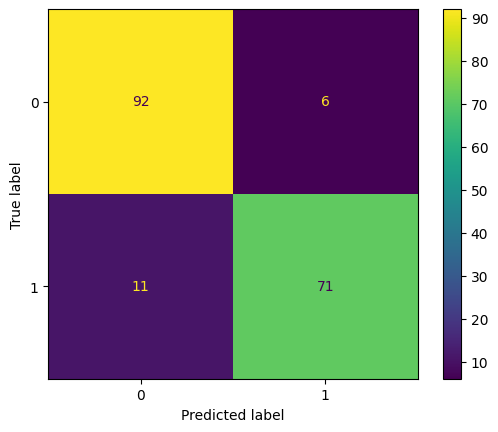

In [58]:
plot_confusion_matrix(grid_model, X_test_scaled, y_test)
plt.show()

In [59]:
# Let's get these scores by using codes;

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.94      0.92        98
           1       0.92      0.87      0.89        82

    accuracy                           0.91       180
   macro avg       0.91      0.90      0.90       180
weighted avg       0.91      0.91      0.91       180



In [60]:
# Long version of eval metrics;
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[92  6]
 [11 71]]
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        98
           1       0.92      0.87      0.89        82

    accuracy                           0.91       180
   macro avg       0.91      0.90      0.90       180
weighted avg       0.91      0.91      0.91       180



Train_Set
[[310  42]
 [ 59 309]]
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       352
           1       0.88      0.84      0.86       368

    accuracy                           0.86       720
   macro avg       0.86      0.86      0.86       720
weighted avg       0.86      0.86      0.86       720



**Evaulation:** The results obtained with GridSearch are identical to the primitive results obtained by the Logistic Regression model. 

## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [61]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import roc_auc_score, auc, roc_curve

In [62]:
from sklearn.linear_model import LogisticRegression # We need it in ROC curve plot 

In [63]:
log_model = LogisticRegression()

In [64]:
log_model.fit(X_train_scaled,y_train)

LogisticRegression()

In [65]:
plot_roc_curve(log_model, X_test_scaled, y_test);

In [66]:
roc_auc_score(y_test, y_pred_proba[:,1])

0.9642857142857143

**Interpret:**  
* The ROC is very close to the left upper corner.
* The AUC score was 0.96, which is quite high. 
* This information shows that the success of the model is high. 

In [67]:
# Let's draw figure of Precision - Recall;

plot_precision_recall_curve(log_model, X_test_scaled, y_test);

**Interpret:**

* The Precision - Recall is very close to the right upper corner.
* The AUC score was 0.97, which is quite high.
* This information shows that the success of the model is high.

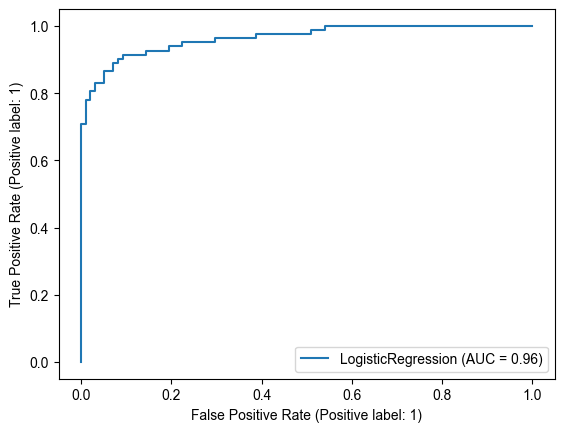

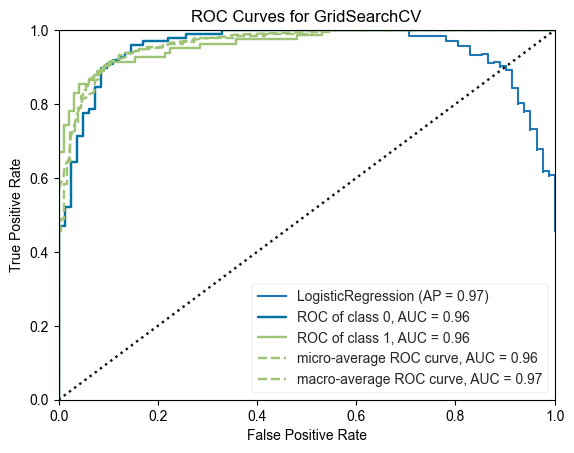

In [68]:
from yellowbrick.classifier import ROCAUC

model = grid_model
visualizer = ROCAUC(model)
visualizer.fit(X_train_scaled, y_train)        # Fit the training data to the visualizer
visualizer.score(X_test_scaled, y_test)        # Evaluate the model on the test data
visualizer.show();

**Interpret:** It can be seen that the model can discriminate both 0 values (Kecimen raisin) and 1 value (Besni raisin) with 93% success. 

# Conclusion 

## Final Model

In [69]:
scaler = StandardScaler().fit(X) # Scale all data 

In [70]:
import pickle
pickle.dump(scaler, open("scaler_raisin", 'wb')) # Save the scale model

In [71]:
X_scaled_raisin = scaler.transform(X) #Transform the scaling to X 

In [72]:
final_model = LogisticRegression().fit(X_scaled_raisin, y) # Fit the final model

In [73]:
pickle.dump(final_model, open("final_model_raisin", 'wb')) #Save the final model

In [74]:
X.describe().T # Look at the describe for creatind a new sample

count      mean       std       min       25%       50%  \
Area            900.000 87804.128 39002.111 25387.000 59348.000 78902.000   
MajorAxisLength 900.000   430.930   116.035   225.630   345.443   407.804   
MinorAxisLength 900.000   254.488    49.989   143.711   219.111   247.848   
Eccentricity    900.000     0.782     0.090     0.349     0.742     0.799   
ConvexArea      900.000 91186.090 40769.290 26139.000 61513.250 81651.000   
Extent          900.000     0.700     0.053     0.380     0.671     0.707   
Perimeter       900.000  1165.907   273.764   619.074   966.411  1119.509   

                       75%        max  
Area            105028.250 235047.000  
MajorAxisLength    494.187    997.292  
MinorAxisLength    279.889    492.275  
Eccentricity         0.843      0.962  
ConvexArea      108375.750 278217.000  
Extent               0.735      0.835  
Perimeter         1308.390   2697.753

In [75]:
my_dict = {"Area": [4.128, 50804.128, 80804.128],
           "MajorAxisLength": [350.930, 200.930, 500.930],
           "MinorAxisLength": [90.488, 280.488, 225.488],
           "Eccentricity": [0.182, 0.682, 0.882],
           "ConvexArea": [46.090, 100186.090, 12086.090],
           "Extent": [0.082, 0.682, 0.882], 
           "Perimeter": [15.907, 1865.907, 2265.907], 
          }
sample = pd.DataFrame(my_dict)
sample

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0     4.128          350.930           90.488         0.182      46.090   
1 50804.128          200.930          280.488         0.682  100186.090   
2 80804.128          500.930          225.488         0.882   12086.090   

   Extent  Perimeter  
0   0.082     15.907  
1   0.682   1865.907  
2   0.882   2265.907

In [76]:
# Predict the samples' result (without scaling);

final_model.predict(sample) 

array([1, 1, 1], dtype=int64)

* In the prediction made without the scaling process, it was concluded that all three new observations were Besni raisin. 

In [77]:
# Let's load the scaling model;

scaler_raisin = pickle.load(open("scaler_raisin", "rb")) 

In [78]:
# Transform the scaling on sample; 

sample_raisin_scaled = scaler_raisin.transform(sample) 
sample_raisin_scaled

array([[ -2.25241186,  -0.68982935,  -3.28255502,  -6.64178552,
         -2.23674916, -11.55549035,  -4.20302791],
       [ -0.94919406,  -1.98326019,   0.52040198,  -1.1027375 ,
          0.22087714,  -0.32762766,   2.55836695],
       [ -0.17957725,   0.60360148,  -0.58045399,   1.11288171,
         -1.94126463,   3.41499324,   4.02029017]])

In [79]:
# Let's load the final model;

final_model = pickle.load(open("final_model_raisin", "rb"))

In [80]:
# Get predictions for scaled sample;

predictions = final_model.predict(sample_raisin_scaled) 
predictions

array([0, 1, 1], dtype=int64)

**ITERPRET:** After scaling, it was concluded that the first of the three new observations was Kecimen and the other two were Besni raisin. 

In [81]:
# Let's obtain proba values of sample;

predictions_proba = final_model.predict_proba(sample_raisin_scaled) 
predictions_proba

array([[9.99862369e-01, 1.37630769e-04],
       [1.19912489e-02, 9.88008751e-01],
       [7.12686494e-05, 9.99928731e-01]])

In [82]:
sample["pred"] = predictions
sample["pred_proba_keçimen"] = predictions_proba[:,0]
sample["pred_proba_besni"] = predictions_proba[:,1]

sample

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0     4.128          350.930           90.488         0.182      46.090   
1 50804.128          200.930          280.488         0.682  100186.090   
2 80804.128          500.930          225.488         0.882   12086.090   

   Extent  Perimeter  pred  pred_proba_keçimen  pred_proba_besni  
0   0.082     15.907     0               1.000             0.000  
1   0.682   1865.907     1               0.012             0.988  
2   0.882   2265.907     1               0.000             1.000

**RESULT:** The final model classified the first observation as Kecimen raisin with 100% probability, the second observation as Besni raisin with 98% probability and the third observation as Besni raisin with 100% probability.  

### Final Model with GridSearch

In [83]:
grid_model.best_params_

{'C': 0.42813323987193935, 'penalty': 'l2', 'solver': 'liblinear'}

In [84]:
# Let's reconstruct the final model with the optimal hyperparameters obtained in GridSearch;

final_model_new = LogisticRegression(C=0.42813323987193935, penalty='l1', solver='liblinear').fit(X_scaled_raisin, y)

In [85]:
# Let's obtain the prediction and the prob values of this prediction in the new final model we built with GridSearch;

prediction2 = final_model_new.predict(sample_raisin_scaled)
prediction_proba2 = final_model_new.predict_proba(sample_raisin_scaled)

In [86]:
sample["pred"] = predictions
sample["pred_proba_keçimen"] = predictions_proba[:,0]
sample["pred_proba_besni"] = predictions_proba[:,1]

sample

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0     4.128          350.930           90.488         0.182      46.090   
1 50804.128          200.930          280.488         0.682  100186.090   
2 80804.128          500.930          225.488         0.882   12086.090   

   Extent  Perimeter  pred  pred_proba_keçimen  pred_proba_besni  
0   0.082     15.907     0               1.000             0.000  
1   0.682   1865.907     1               0.012             0.988  
2   0.882   2265.907     1               0.000             1.000

**RESULT:** The new final model classified the first observation as Kecimen raisin with 100% probability, the second observation as Besni raisin with 98% probability and the third observation as Besni raisin with 100% probability.  

# Pipeline

In order to automate the above processes, get rid of the data leakage problem, and to minimize the risk of errors in the process steps, let's set up a pipeline;

In [87]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [88]:
operations = [("scaler", StandardScaler()), 
              ("logistic", LogisticRegression())]

In [89]:
pipe_model = Pipeline(steps=operations)

In [90]:
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

In [91]:
y_pred = pipe_model.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0], dtype=int64)

## Changing the parameters of the pipe_model

In [92]:
pipe_model.get_params() # It brings the relevant parameter list according to the ML algorithm we have chosen.

{'memory': None,
 'steps': [('scaler', StandardScaler()), ('logistic', LogisticRegression())],
 'verbose': False,
 'scaler': StandardScaler(),
 'logistic': LogisticRegression(),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'logistic__C': 1.0,
 'logistic__class_weight': None,
 'logistic__dual': False,
 'logistic__fit_intercept': True,
 'logistic__intercept_scaling': 1,
 'logistic__l1_ratio': None,
 'logistic__max_iter': 100,
 'logistic__multi_class': 'auto',
 'logistic__n_jobs': None,
 'logistic__penalty': 'l2',
 'logistic__random_state': None,
 'logistic__solver': 'lbfgs',
 'logistic__tol': 0.0001,
 'logistic__verbose': 0,
 'logistic__warm_start': False}

In [93]:
pipe_model.set_params(logistic__max_iter=100)

# Changes the required parameter from the list above.

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic', LogisticRegression())])

## GridSearch on Pipeline

In [94]:
from sklearn.model_selection import GridSearchCV

In [95]:
penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)
param_grid = {
    "logistic__solver": ['liblinear', 'saga'],
    "logistic__penalty": penalty,
     "logistic__C" : C
}

In [96]:
operations = [("scaler", StandardScaler()), 
              ("logistic", LogisticRegression())]

In [97]:
pipe_model = Pipeline(steps=operations) # set the pipe_model

In [98]:
# Set the pipe Grid model; 

pipe_grid = GridSearchCV(pipe_model, param_grid, cv=10, scoring= "accuracy")

In [99]:
pipe_grid.fit(X_train,y_train) # fit the grid-pipline model

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic', LogisticRegression())]),
             param_grid={'logistic__C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'logistic__penalty': ['l1', 'l2'],
                         'logistic__solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [100]:
pipe_grid.best_params_  # best parameters for grid-pipline model

{'logistic__C': 0.42813323987193935,
 'logistic__penalty': 'l2',
 'logistic__solver': 'liblinear'}

In [101]:
pipe_grid.best_score_ # accuracy

0.861111111111111

## Final pipe_model

In [102]:
operations = [("scaler", StandardScaler()), 
              ("logistic", LogisticRegression(C = 0.8858667904100825,
                                             penalty = 'l1',
                                             solver = 'liblinear'))]
# We got the hyperparameters in LogisticRegression from pipe_grid.best_params_.

In [103]:
pipe_final = Pipeline(operations) # set the final piplne model

In [104]:
pipe_final.fit(X, y) # fit the final pipline model

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.8858667904100825, penalty='l1',
                                    solver='liblinear'))])

## Predict New Observations with pipe_model

In [105]:
my_dict = {"Area": [4.128, 50804.128, 80804.128],
           "MajorAxisLength": [350.930, 200.930, 500.930],
           "MinorAxisLength": [90.488, 280.488, 225.488],
           "Eccentricity": [0.182, 0.682, 0.882],
           "ConvexArea": [46.090, 100186.090, 12086.090],
           "Extent": [0.082, 0.682, 0.882], 
           "Perimeter": [15.907, 1865.907, 2265.907], 
          }
sample = pd.DataFrame(my_dict)
sample

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0     4.128          350.930           90.488         0.182      46.090   
1 50804.128          200.930          280.488         0.682  100186.090   
2 80804.128          500.930          225.488         0.882   12086.090   

   Extent  Perimeter  
0   0.082     15.907  
1   0.682   1865.907  
2   0.882   2265.907

In [106]:
predictions = pipe_final.predict(sample)
predictions

array([0, 1, 1], dtype=int64)

In [107]:
predictions_proba = pipe_final.predict_proba(sample)
predictions_proba

array([[9.99998496e-01, 1.50361889e-06],
       [7.72370455e-05, 9.99922763e-01],
       [1.09093305e-07, 9.99999891e-01]])

In [108]:
sample["pred"] = predictions
sample["pred_proba_kecimen"] = predictions_proba[:,0]
sample["pred_proba_besni"] = predictions_proba[:,1]

sample

Area  MajorAxisLength  MinorAxisLength  Eccentricity  ConvexArea  \
0     4.128          350.930           90.488         0.182      46.090   
1 50804.128          200.930          280.488         0.682  100186.090   
2 80804.128          500.930          225.488         0.882   12086.090   

   Extent  Perimeter  pred  pred_proba_kecimen  pred_proba_besni  
0   0.082     15.907     0               1.000             0.000  
1   0.682   1865.907     1               0.000             1.000  
2   0.882   2265.907     1               0.000             1.000

**RESULT:** The final-pipline model classified the first observation as Kecimen raisin with 100% probability, the others were classified as Besni raisin with 100% probability. 

# CONCLUSSION





# REFERENCES

Cınar, I., Koklu, M. and Tasdemir, S. (2020). “Classification of Raisin Grains Using Machine Vision and Artificial Intelligence Methods”. Gazi Journal of Engineering Sciences, vol. 6, no. 3, pp. 200-209, doi: https://dx.doi.org/10.30855/gmbd.2020.03.03

Karimi, N., Arabhosseini, A., Kianmehr, M. H. and Khazaei, J. (2011). “Modelling of raisin berries by some physical and statistical characteristics,” Int. Agrophys. vol. 25(2), pp. 141-147.

Karimi, N., Kondrood, R.R. and Alizadeh, T. (2017). “An intelligent system for quality measurement of Golden 
Bleached raisins using two comparative machine learning algorithms”. Measurement, vol. 107, pp. 68-76. 
doi:10.1016/j.measurement.2017.05.009

Mollazade, K., Omid, M. and Arefi, A. (2012). “Comparing data mining classifiers for grading raisins based on visual features”. Computers electronics in agriculture, vol. 84, pp. 124-131. doi:10.1016/j.compag.2012.03.00
 
Semerci, A., Kızıltuğ, T., Çelik, A., and Kiracı, M. (2015). "Türkiye bağcılığının genel durumu" Mustafa Kemal 
Üniversitesi Ziraat Fakültesi Dergisi, vol. 20(2), pp. 42-51.
